# Análisis estadístico del proyecto efecto de un entrenamiento en conciencia fonémica basado en aprendizaje corporeizado (FONEMACOR) sobre el control inhibitorio y la flexibilidad cognitiva

## Objetivo
Realizar la descripción estadística e inferencial de las pruebas de rendimiento de tres grupos de niños de 5 años con distintos entrenamientos: uno corporeizado (FONEMACOR), otro sin ser corporeizado (CONCRES) y uno sin entrenamiento. La base de datos contiene información sociodemográfica, datos sobre los parientes del niño, información de rutinas y enfermedades, y los resultados pre y post aplicación de los entrenamientos para analizar el control inhibitorio y la flexibilidad cognitiva.

## Importar librerias necesarias

In [1]:
# Importar librerías requeridas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Cargue y limpieza de los datos
Se requiere hacer uso de la libreria pandas para cargar los datos a este notebook de python. Se toma en cuenta que el encabezado empieza en la segunda fila del archivo excel cuyo nombre es 'Base de datos PIEDAD LERMA 1207.xlsx' y se guardan en la variable df_inicial. Lo que sigue es observar las cinco primeras filas de este y la información concerniente a la base de datos.

In [2]:
# Cargar los datos desde el archivo Excel (header en la segunda fila)
df_inicial = pd.read_excel('Base de datos PIEDAD LERMA  1207.xlsx', header=1)

# Mostrar las primeras filas del DataFrame
display(df_inicial.head())

# Mostrar información general del DataFrame
df_inicial.info()

,GRUPOS,CÓDIGO,EDAD,SEXO,ESTRATO SOCIOECONÓMICO,AFILIACIÓN EN SALUD,EPS,RESIDENCIA,ESTADO CIVIL DE LOS PADRES,NIVEL EDUCATIVO (MADRE),...,¿ENFERMEDAD VISUAL?,¿GAFAS FORMULADAS?,¿DIAGNOSTICADO CON ALGÚN TRASTORNO DE HABLA?,¿CÚAL?.1,¿DIAGNOSTICADO CON ALGÚN TRASTORNO AUDITIVO?,¿CÚAL?.2,Uncorrected Standard Score,Uncorrected Standard Score.1,Uncorrected Standard Score.2,Uncorrected Standard Score.3
0,Concres,NA1,5 años,0,1,2,Comfamiliar,0,4,3,...,No,No,Si,Trastorno del habla,No,No aplica,98,108,79,107
1,Fonemacor,NA10,5 años,0,1,1,Sanidad Militar,0,1,4,...,No,No,No,No aplica,No,No aplica,90,103,93,96
2,Control,NA11,5 años,1,1,1,Famisanar,0,4,3,...,No,No,No,No aplica,No,No aplica,91,94,92,94
3,Control,NA12,5 años,1,3,1,Nueva Eps,0,4,3,...,No,No,No,No aplica,No,No aplica,95,98,98,99
4,Fonemacor,NA13,5 años,0,3,1,Nueva Eps,0,3,3,...,No,No,No,No aplica,No,No aplica,92,99,90,108


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   GRUPOS                                         72 non-null     object
 1   CÓDIGO                                         72 non-null     object
 2   EDAD                                           72 non-null     object
 3   SEXO                                           72 non-null     int64 
 4   ESTRATO SOCIOECONÓMICO                         72 non-null     int64 
 5   AFILIACIÓN EN SALUD                            72 non-null     int64 
 6   EPS                                            72 non-null     object
 7   RESIDENCIA                                     72 non-null     int64 
 8   ESTADO CIVIL DE LOS PADRES                     72 non-null     int64 
 9   NIVEL EDUCATIVO (MADRE)                        72 non-null     int6

En estos dos resultados se logra observar detalles muy importantes:
- No hay valores nulos en ninguna columna
- Existen 11 columnas con tipo de dato int64, esto es un entero que puede guardar 64 caracteres.
- Existen 16 columnas con tipo de dato object, lo que implica una cadena de caracteres.

Ahora se procede a eliminar columnas que no se requieren para el análisis estadístico inicial, se formatea el nombre de columna acorde a las buenas prácticas en el análisis de datos y se convierte a tipo categoria cuando se habla de variables categóricas como las carácteristicas sociodemográficas de los niños y a int32 a las columnas que reflejan el resultado de las pruebas pre y post entrenamiento de las variables de control inhibitorio y flexibilidad cognitiva.

In [3]:
# Crear una copia del dataframe original para limpieza
df_copia = df_inicial.copy()

# Eliminar columnas no necesarias
columnas_a_eliminar = [
    'CÓDIGO', 'EDAD', 'EPS', '¿CÚAL?', 'VECES A LA SEMANA', 'AFILIACIÓN EN SALUD', 'USO DE PANTALLAS (CELULARES, TV, ETC)', '¿ENFERMEDAD VISUAL?', '¿GAFAS FORMULADAS?',
    '¿DIAGNOSTICADO CON ALGÚN TRASTORNO DE HABLA?', '¿CÚAL?.1',
    '¿DIAGNOSTICADO CON ALGÚN TRASTORNO AUDITIVO?', '¿CÚAL?.2'
]
df_copia = df_copia.drop(columns=columnas_a_eliminar)

# Quitar espacios al final en nombres de columnas
columnas_strip = ['GRUPOS ', 'RESIDENCIA ']
df_copia.rename(columns={col: col.strip() for col in columnas_strip}, inplace=True)

# Reemplazar espacios por guiones bajos en nombres de columnas
for col in ['ESTRATO SOCIOECONÓMICO', 'ESTADO CIVIL DE LOS PADRES', 'NIVEL EDUCATIVO (MADRE)',
    'NIVEL EDUCATIVO (PADRE)', '¿PRACTICA ALGÚN DEPORTE?',
    '¿LEE O LE LEEN LIBROS? ( Cuentos infantiles )',
    '¿CÚANTO TIEMPO ESTÁ EXPUESTO?']:
    if col in df_copia.columns:
        nuevo_nombre = col.replace(' ', '_')
        df_copia.rename(columns={col: nuevo_nombre}, inplace=True)

# Convertir columnas a tipo categoría
columnas_categoria = [
    'GRUPOS', 'SEXO', 'ESTRATO_SOCIOECONÓMICO', 'RESIDENCIA', 'ESTADO_CIVIL_DE_LOS_PADRES',
    'NIVEL_EDUCATIVO_(MADRE)', 'NIVEL_EDUCATIVO_(PADRE)', '¿PRACTICA_ALGÚN_DEPORTE?', '¿LEE_O_LE_LEEN_LIBROS?_(_Cuentos_infantiles_)',
    '¿CÚANTO_TIEMPO_ESTÁ_EXPUESTO?']
for col in columnas_categoria:
    if col in df_copia.columns:
        df_copia[col] = df_copia[col].astype('category')

# Renombrar columnas de puntajes y cambiar tipo a int32
nuevos_nombres = {
    'Uncorrected Standard Score': 'pre_control_inhibitorio',
    'Uncorrected Standard Score.1': 'post_control_inhibitorio',
    'Uncorrected Standard Score.2': 'pre_flexibilidad_cognitiva',
    'Uncorrected Standard Score.3': 'post_flexibilidad_cognitiva'
}
df_copia = df_copia.rename(columns=nuevos_nombres)
for col in nuevos_nombres.values():
    if col in df_copia.columns:
        df_copia[col] = df_copia[col].astype('int32')

# Imprimir nombres de columnas tras la limpieza
print(df_copia.columns.tolist())

# Mostrar las primeras filas y la información general del DataFrame limpio
display(df_copia.head())
df_copia.info()

['GRUPOS', 'SEXO', 'ESTRATO_SOCIOECONÓMICO', 'RESIDENCIA', 'ESTADO_CIVIL_DE_LOS_PADRES', 'NIVEL_EDUCATIVO_(MADRE)', 'NIVEL_EDUCATIVO_(PADRE)', '¿PRACTICA_ALGÚN_DEPORTE?', '¿LEE_O_LE_LEEN_LIBROS?_(_Cuentos_infantiles_)', '¿CÚANTO_TIEMPO_ESTÁ_EXPUESTO?', 'pre_control_inhibitorio', 'post_control_inhibitorio', 'pre_flexibilidad_cognitiva', 'post_flexibilidad_cognitiva']


,GRUPOS,SEXO,ESTRATO_SOCIOECONÓMICO,RESIDENCIA,ESTADO_CIVIL_DE_LOS_PADRES,NIVEL_EDUCATIVO_(MADRE),NIVEL_EDUCATIVO_(PADRE),¿PRACTICA_ALGÚN_DEPORTE?,¿LEE_O_LE_LEEN_LIBROS?_(_Cuentos_infantiles_),¿CÚANTO_TIEMPO_ESTÁ_EXPUESTO?,pre_control_inhibitorio,post_control_inhibitorio,pre_flexibilidad_cognitiva,post_flexibilidad_cognitiva
0,Concres,0,1,0,4,3,3,No,Si,2h,98,108,79,107
1,Fonemacor,0,1,0,1,4,6,Si,Si,No aplica,90,103,93,96
2,Control,1,1,0,4,3,4,Si,Si,1h,91,94,92,94
3,Control,1,3,0,4,3,6,No,No,3h,95,98,98,99
4,Fonemacor,0,3,0,3,3,3,No,No,2h,92,99,90,108


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   GRUPOS                                         72 non-null     category
 1   SEXO                                           72 non-null     category
 2   ESTRATO_SOCIOECONÓMICO                         72 non-null     category
 3   RESIDENCIA                                     72 non-null     category
 4   ESTADO_CIVIL_DE_LOS_PADRES                     72 non-null     category
 5   NIVEL_EDUCATIVO_(MADRE)                        72 non-null     category
 6   NIVEL_EDUCATIVO_(PADRE)                        72 non-null     category
 7   ¿PRACTICA_ALGÚN_DEPORTE?                       72 non-null     category
 8   ¿LEE_O_LE_LEEN_LIBROS?_(_Cuentos_infantiles_)  72 non-null     category
 9   ¿CÚANTO_TIEMPO_ESTÁ_EXPUESTO?                

Justo aqui se observa el formateo de la base de datos acorde a las buenas prácticas y que el uso de memoria se ha reducido considerablemente pasando de 15.4 KB a 3.8 KB.

El último paso en esta limpieza de datos es verificar que los valores de cada una de las variables categóricas sea correcto.

In [4]:
# Verificar los valores únicos y sus conteos de las variables categóricas
df_categoricas = df_copia.select_dtypes(['category'])
for col in df_categoricas.columns:
    print(f'Columna: {col}')
    print(df_copia[col].value_counts(dropna=False))
    print('\n' + '-'*40 + '\n')

Columna: GRUPOS
GRUPOS
Concres      24
Control      24
Fonemacor    24
Name: count, dtype: int64

----------------------------------------

Columna: SEXO
SEXO
0    38
1    34
Name: count, dtype: int64

----------------------------------------

Columna: ESTRATO_SOCIOECONÓMICO
ESTRATO_SOCIOECONÓMICO
1    29
2    22
3    20
4     1
Name: count, dtype: int64

----------------------------------------

Columna: RESIDENCIA
RESIDENCIA
0    67
1     4
4     1
Name: count, dtype: int64

----------------------------------------

Columna: ESTADO_CIVIL_DE_LOS_PADRES
ESTADO_CIVIL_DE_LOS_PADRES
4    35
3    18
1    14
0     5
Name: count, dtype: int64

----------------------------------------

Columna: NIVEL_EDUCATIVO_(MADRE)
NIVEL_EDUCATIVO_(MADRE)
3    28
4    19
6    15
5     6
2     4
Name: count, dtype: int64

----------------------------------------

Columna: NIVEL_EDUCATIVO_(PADRE)
NIVEL_EDUCATIVO_(PADRE)
3    33
4    16
6    12
5     7
1     2
2     2
Name: count, dtype: int64

--------------

De aquí se puede resolver lo siguiente:
- Los niños fueron divididos en tres grupos quienes recibieron distintos entrenamientos. La columna GRUPOS corresponde al entrenamiento recibido, por tanto tiene tres valores y a cada grupo fue asignado el mismo número de estudiantes: 24.
- La columna SEXO tiene dos valores, el valor 0 para Masculino, y el valor 1 para Femenino. En este estudio fueron evaluados 38 niños y 34 niñas. Este tamaño de muestra de ambos posibles valores es similar, lo que permitiría hacer comparaciones o hipótesis interesantes en el informe a entregar.
- El estrato socioeconómico de los estudiantes tiene cuatro valores, que están dados por Bajo (1), Medio-bajo (2), Medio (3), y Medio-alto (4), con los conteos dados en este resumen. En el estrato Medio-alto sólo hay un estudiante, por lo cuál se requiere verificar a qué grupo pertenece y pasarlo al estrato justo anterior del mismo grupo.
- La categoría de RESIDENCIA tiene dos valores, el valor 0 para Urbano y el valor 1 para Rural. Esto implica que el valor 4 mostrado en el resumen es un error. Se requiere hacer la corrección y cambiar este valor a 0, que implica que hay 68 estudiantes cuya residencia es urbana y 4 estudiantes cuya residencia es rural. Sin embargo, la muestra de estudiantes en residencia de tipo rural es tan reducida que hacer distribuciones discriminadas por esta variable categórica no brindará ningún análisis adicional.
- Respecto al estado civil de los padres se debe hacer el cambio de Soltero (0) a Separado (3). Los otros valores se dejan como están: Casado (1) y Unión libre (4).
- En el caso del nivel educativo de la madre existen dos diferentes respuestas con pocos valores. Ellos son primaria (2) y tecnológico (5), los cuales se reemplazan a secundaria (3) y técnico (4), respectivamente. El otro valor de educación es universitario (6).
- En el caso del nivel educativo del padre existen tres diferentes respuestas con pocos valores. Ellos son ninguno (1), primaria (2), y tecnológico (5). Los dos primeros se reemplazan por secundaria (3), y para el tecnológico se procede al igual que para la madre.
- Para la columna ¿practica algún deporte?, aparecen tres valores, dos distintos No y un Si. Lo más probable es que uno de los No tenga un espacio adicional. La corrección a realizar es quitarle tal espacio.
- Para la columna ¿lee o le leen libros (cuentos infantiles)? existen dos posibles valores con las frecuencias mostradas en el resumen.
- Por último, se observa en la columna ¿cuánto tiempo está expuesto? hay 9 distintos valores. Se va a dividir estos valores en 5 distintas categorias, llamadas '<1h', '1h', '2h', '3h', y '>3h'. Los niños con valores 'No aplica' y '10 min' se reemplazan por la primera categoria, las otras tres siguientes categorias no tienen cambios, excepto por la categoria '2h' a la cual se le debe agregar el niño con valor en esta categoria de '1-2 h'. Y los niños con '4h', '5h', y '6h' se reemplazan por la categoria '>3h'.

A continuación se hacen las respectivas correcciones.

In [5]:
# Corregir del valor 4 por 0 en la columna RESIDENCIA
df_copia['RESIDENCIA'] = df_copia['RESIDENCIA'].replace(4, 0)

# Reemplazar valores específicos en columnas categóricas
df_copia['ESTRATO_SOCIOECONÓMICO'] = df_copia['ESTRATO_SOCIOECONÓMICO'].replace(4, 3)
df_copia['ESTADO_CIVIL_DE_LOS_PADRES'] = df_copia['ESTADO_CIVIL_DE_LOS_PADRES'].replace(0, 3)
df_copia['NIVEL_EDUCATIVO_(MADRE)'] = df_copia['NIVEL_EDUCATIVO_(MADRE)'].replace({2: 3, 5: 4})
df_copia['NIVEL_EDUCATIVO_(PADRE)'] = df_copia['NIVEL_EDUCATIVO_(PADRE)'].replace({1: 3, 2: 3, 5: 4})

# Eliminar espacios extra en todos los valores de la columna
df_copia['¿PRACTICA_ALGÚN_DEPORTE?'] = df_copia['¿PRACTICA_ALGÚN_DEPORTE?'].str.strip()

# Reemplazo y agrupación de valores en la columna '¿CUÁNTO_TIEMPO_ESTÁ_EXPUESTO?'
mapeo_tiempo = {
    'No aplica ': '<1h',
    '10 min': '<1h',
    '1h': '1h',
    '2h': '2h',
    '1-2 h': '2h',
    '3h': '3h',
    '4h': '>3h',
    '5h': '>3h',
    '6h': '>3h'
}
df_copia['¿CÚANTO_TIEMPO_ESTÁ_EXPUESTO?'] = df_copia['¿CÚANTO_TIEMPO_ESTÁ_EXPUESTO?'].replace(mapeo_tiempo)

# Verificar el cambio realizado en todas las columnas categóricas
for col in df_copia.select_dtypes(['category']).columns:
    print(f'Columna: {col}')
    print(df_copia[col].value_counts(dropna=False))
    print('\n' + '-'*40 + '\n')

Columna: GRUPOS
GRUPOS
Concres      24
Control      24
Fonemacor    24
Name: count, dtype: int64

----------------------------------------

Columna: SEXO
SEXO
0    38
1    34
Name: count, dtype: int64

----------------------------------------

Columna: ESTRATO_SOCIOECONÓMICO
ESTRATO_SOCIOECONÓMICO
1    29
2    22
3    21
Name: count, dtype: int64

----------------------------------------

Columna: RESIDENCIA
RESIDENCIA
0    68
1     4
Name: count, dtype: int64

----------------------------------------

Columna: ESTADO_CIVIL_DE_LOS_PADRES
ESTADO_CIVIL_DE_LOS_PADRES
4    35
3    23
1    14
Name: count, dtype: int64

----------------------------------------

Columna: NIVEL_EDUCATIVO_(MADRE)
NIVEL_EDUCATIVO_(MADRE)
3    32
4    25
6    15
Name: count, dtype: int64

----------------------------------------

Columna: NIVEL_EDUCATIVO_(PADRE)
NIVEL_EDUCATIVO_(PADRE)
3    37
4    23
6    12
Name: count, dtype: int64

----------------------------------------

Columna: ¿LEE_O_LE_LEEN_LIBROS?_(_Cu

C:\Users\danie\AppData\Local\Temp\ipykernel_13876\641127631.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_copia['RESIDENCIA'] = df_copia['RESIDENCIA'].replace(4, 0)
C:\Users\danie\AppData\Local\Temp\ipykernel_13876\641127631.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_copia['ESTRATO_SOCIOECONÓMICO'] = df_copia['ESTRATO_SOCIOECONÓMICO'].replace(4, 3)
C:\Users\danie\AppData\Local\Temp\ipykernel_13876\641127631.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, repl

## Análisis estadístico de la base de datos

Antes de graficar las distribuciones de los test, se requiere generar una nueva característica que ayude en el momento de hacer el análisis inferencial, es decir, los test paramétricos o no paamétricos dependiendo de la normalidad de esta característica. La manera de estudiar diferencias entre los entrenamientos será a partir de la media de la diferencia entre el rendimiento de las pruebas despues de aplicar el entrenamiento y antes de ser aplicado. Esto es:

In [6]:
# Crear nuevas características de diferencia entre post y pre

df_copia['dif_control_inhibitorio'] = df_copia['post_control_inhibitorio'] - df_copia['pre_control_inhibitorio']
df_copia['dif_flexibilidad_cognitiva'] = df_copia['post_flexibilidad_cognitiva'] - df_copia['pre_flexibilidad_cognitiva']

# Mostrar las primeras filas para verificar
print(df_copia[['pre_control_inhibitorio', 'post_control_inhibitorio', 'dif_control_inhibitorio',
               'pre_flexibilidad_cognitiva', 'post_flexibilidad_cognitiva', 'dif_flexibilidad_cognitiva']].head())

# Guardar el DataFrame limpio y con nuevas características en un archivo Excel para análisis posterior
# df_copia.to_excel('Base de datos PIEDAD LERMA para analisis.xlsx', index=False)

   pre_control_inhibitorio  post_control_inhibitorio  dif_control_inhibitorio  \
0                       98                       108                       10   
1                       90                       103                       13   
2                       91                        94                        3   
3                       95                        98                        3   
4                       92                        99                        7   

   pre_flexibilidad_cognitiva  post_flexibilidad_cognitiva  \
0                          79                          107   
1                          93                           96   
2                          92                           94   
3                          98                           99   
4                          90                          108   

   dif_flexibilidad_cognitiva  
0                          28  
1                           3  
2                           2  
3           

### Estadística descriptiva de ambas variables dependientes
A continuación se presenta los resumenes de las estadísticas de la nueva característica que describe el rendimiento en ambas pruebas.

In [7]:
# Resumen estadístico de las características de diferencia por grupo
resumen_control = df_copia.groupby('GRUPOS')['dif_control_inhibitorio'].describe()
resumen_flexibilidad = df_copia.groupby('GRUPOS')['dif_flexibilidad_cognitiva'].describe()

# print('Resumen estadístico de la diferencia en control inhibitorio por grupo:')
# display(resumen_control)

# print('Resumen estadístico de la diferencia en flexibilidad cognitiva por grupo:')
# display(resumen_flexibilidad)

# Resumen estadístico de las variables pre y post por grupo
resumen_pre_control = df_copia.groupby('GRUPOS')['pre_control_inhibitorio'].describe()
resumen_post_control = df_copia.groupby('GRUPOS')['post_control_inhibitorio'].describe()
resumen_pre_flexibilidad = df_copia.groupby('GRUPOS')['pre_flexibilidad_cognitiva'].describe()
resumen_post_flexibilidad = df_copia.groupby('GRUPOS')['post_flexibilidad_cognitiva'].describe()

# print('Resumen estadístico de pre_control_inhibitorio por grupo:')
# display(resumen_pre_control)

# print('Resumen estadístico de post_control_inhibitorio por grupo:')
# display(resumen_post_control)

# print('Resumen estadístico de pre_flexibilidad_cognitiva por grupo:')
# display(resumen_pre_flexibilidad)

# print('Resumen estadístico de post_flexibilidad_cognitiva por grupo:')
# display(resumen_post_flexibilidad)

C:\Users\danie\AppData\Local\Temp\ipykernel_13876\4065141750.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen_control = df_copia.groupby('GRUPOS')['dif_control_inhibitorio'].describe()
C:\Users\danie\AppData\Local\Temp\ipykernel_13876\4065141750.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen_flexibilidad = df_copia.groupby('GRUPOS')['dif_flexibilidad_cognitiva'].describe()
C:\Users\danie\AppData\Local\Temp\ipykernel_13876\4065141750.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain 

A continuación se complementa este resumen con la visualización de las distribuciones usando diagrama de cajas y las graficas del cambio de la media y la mediana por cada grupo experimental previo y posterior al entrenamiento.

### Visualización del cambio previo y posterior a la aplicación del entrenamiento

Se muestra el cambio de la media y la mediana para los tres grupos en un diagrama de lineas.

C:\Users\danie\AppData\Local\Temp\ipykernel_13876\2070516990.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend(title='Grupo')
C:\Users\danie\AppData\Local\Temp\ipykernel_13876\2070516990.py:66: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend(title='Grupo')


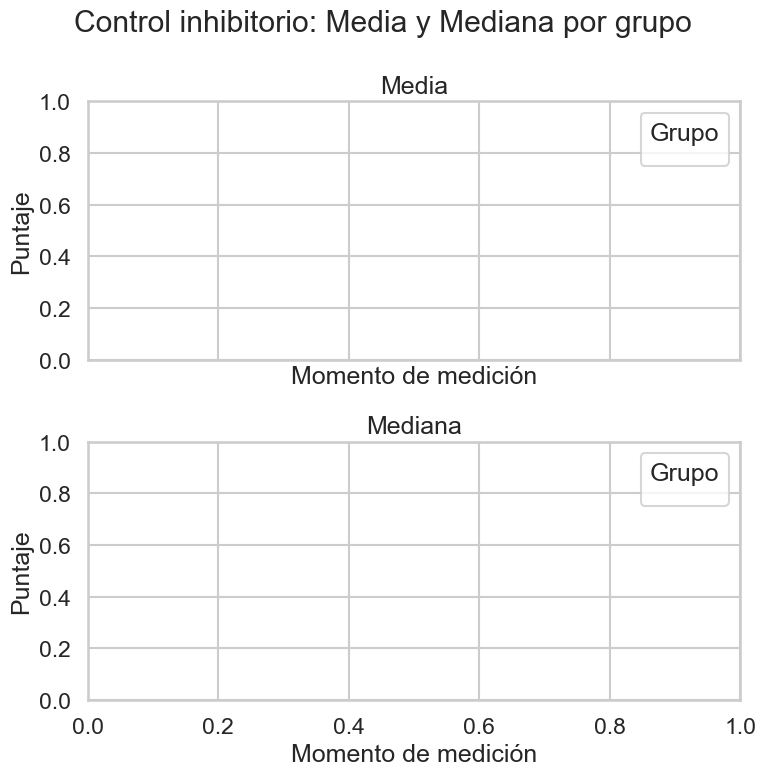

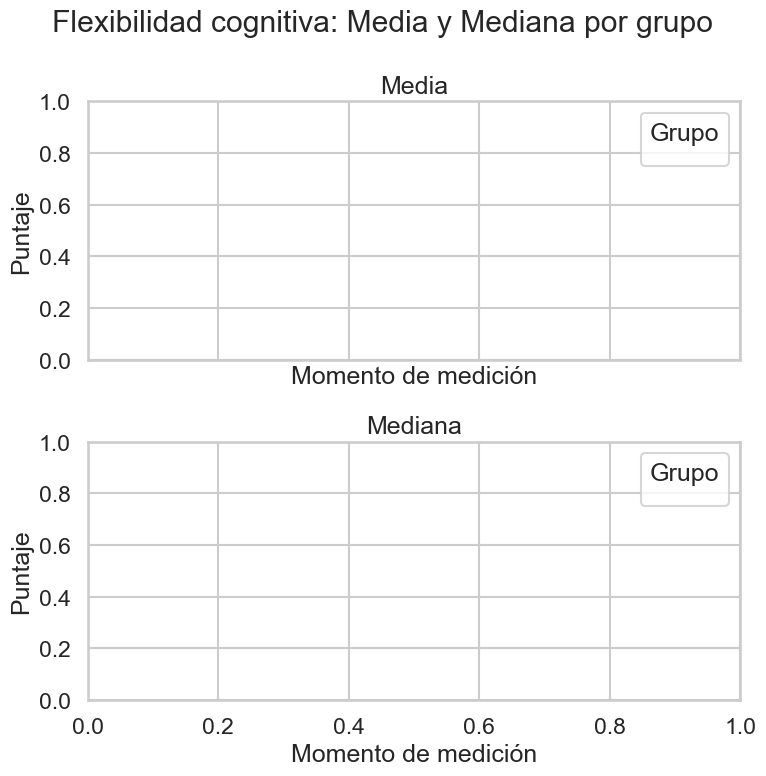

In [44]:
# Reorganizar los datos a formato largo para graficar pre y post por grupo",
df_long = pd.melt(
    df_copia,
    id_vars=['GRUPOS'],
    value_vars=['pre_control_inhibitorio', 'post_control_inhibitorio', 'pre_flexibilidad_cognitiva', 'post_flexibilidad_cognitiva'],
    var_name='Momento',
    value_name='Puntaje'
)
df_long['Dominio'] = df_long['Momento'].apply(lambda x: 'Control inhibitorio' if 'control' in x else 'Flexibilidad cognitiva')
df_long['Momento'] = df_long['Momento'].replace({
    'pre_control_inhibitorio': 'Pre',
    'post_control_inhibitorio': 'Post',
    'pre_flexibilidad_cognitiva': 'Pre',
    'post_flexibilidad_cognitiva': 'Post'
})

sns.set(style="whitegrid")
sns.set_palette("Set2")
sns.set_context("talk")

# Gráfico para Control inhibitorio: media y mediana en subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True, sharey=True)
dominio = 'Control inhibitorio'
for i, estimator in enumerate([np.mean, np.median]):
    #sns.pointplot(
    #    data=df_long[df_long['Dominio'] == dominio],
    #    x='Momento',
    #    y='Puntaje',
    #    hue='GRUPOS',
    #    hue_order=['Control', 'Concres ', 'Fonemacor'],
    #    dodge=True,
    #    markers='o',
    #    capsize=.1,
    #    errorbar=None,
    #    estimator=estimator,
    #    ax=axes[i]
    #)
    axes[i].set_title(f'{"Media" if estimator==np.mean else "Mediana"}')
    axes[i].set_xlabel('Momento de medición')
    axes[i].set_ylabel('Puntaje')
    axes[i].legend(title='Grupo')
plt.suptitle('Control inhibitorio: Media y Mediana por grupo')
plt.tight_layout()
# plt.show()

# Gráfico para Flexibilidad cognitiva: media y mediana en subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True, sharey=True)
dominio = 'Flexibilidad cognitiva'
for i, estimator in enumerate([np.mean, np.median]):
    #sns.pointplot(
    #    data=df_long[df_long['Dominio'] == dominio],
    #    x='Momento',
    #    y='Puntaje',
    #    hue='GRUPOS',
    #    hue_order=['Control', 'Concres ', 'Fonemacor'],
    #    dodge=True,
    #    markers='o',
    #    capsize=.1,
    #    errorbar=None,
    #    estimator=estimator,
    #    ax=axes[i]
    #)
    axes[i].set_title(f'{"Media" if estimator==np.mean else "Mediana"}')
    axes[i].set_xlabel('Momento de medición')
    axes[i].set_ylabel('Puntaje')
    axes[i].legend(title='Grupo')
plt.suptitle('Flexibilidad cognitiva: Media y Mediana por grupo')
plt.tight_layout()
# plt.show()

### Visualización de las distribuciones para el control inhibitorio
Se muestran de dos maneras distintas cómo se distribuye la diferencia entre pre-aplicación y post-aplicación del entrenamiento por grupo.


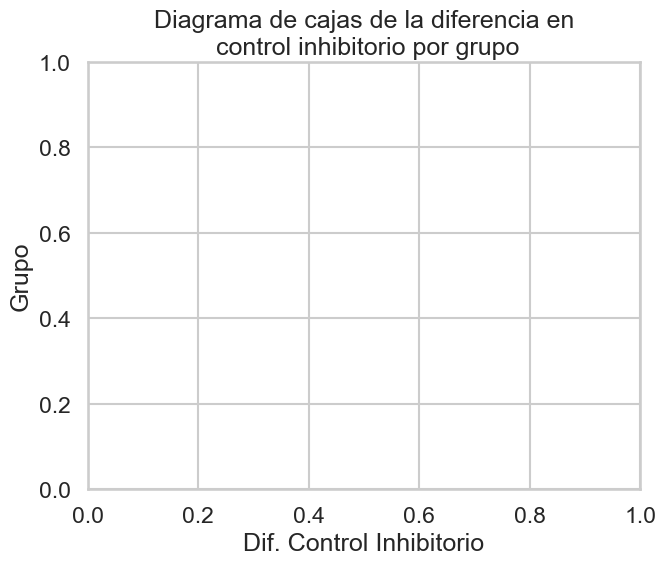

In [45]:
# Boxplot de la diferencia en control inhibitorio por grupo
sns.set_context('talk')
plt.figure(figsize=(7, 6))
#sns.boxplot(x='dif_control_inhibitorio', y='GRUPOS', data=df_copia, order=['Control', 'Concres ', 'Fonemacor'])
plt.title('Diagrama de cajas de la diferencia en\n control inhibitorio por grupo')
plt.xlabel('Dif. Control Inhibitorio')
plt.ylabel('Grupo')
plt.tight_layout()
# plt.show()

Este es un gráfico de cajas que muestra la forma de la distribución para cada uno de los grupos experimentales del rendimiento en la medición del control inhibitorio. En un diagrama de cajas la línea central dentro de la caja representa la mediana, las siguientes líneas hacia fuera representan los cuartiles del 25% y del 75%, cuya diferencia es llamada rango intercuartílico (IQR), luego se muestra líneas horizontales llamadas bigotes, que se extienden desde estos cuartiles hasta 1.5 veces el IQR, y fuera de ellos los valores atípicos mostrados como puntos. 

CONCRES es el grupo sin énfasis en aprendizaje corporeizado, Control es el grupo control, es decir, quienes tuvieron de entrenamiento el proyecto de aula aplicado en la institución, y FONEMACOR es el grupo con aprendizaje corporeizado. Varios detalles son llamativos en este gráfico:
- La mediana más grande, es decir, quienes tuvieron mejor rendimiento, es la del grupo FONEMACOR.
- El único grupo con características típicas de una variable con distribución normal es FONEMACOR. Estas características son la simetría, que se percibe a partir de una igual longitud de los bigotes; la no existencia de valores atípicos; y una mediana cercana al centro de la caja.
- En contraste los otros dos grupos tienen características típicas de variables cuyas distribuciones no son normales. Para el caso del grupo CONCRES se observa que el bigote a la derecha de la caja es mucho más largo que el de la izquierda, y que existen valores atípicos hacia la derecha del diagrama.
- Para el caso del grupo de control se observa que la línea de la mediana coincide con alguno de los cuartiles (volviendo al cuadro superior, que muestra el análisis descriptivo, la mediana y el cuartil del 75% tienen igual valor), y que existen datos atípicos hacia la derecha del diagrama.

In [10]:
# Gráfico de conteo usando catplot por grupo para dif_control_inhibitorio
sns.set_context('talk')
def round_mid(interval):
    return int(round(interval.mid, 0))
bins_control = pd.cut(df_copia['dif_control_inhibitorio'], bins=7)
df_copia['dif_control_inhibitorio_bin_mean'] = bins_control.apply(round_mid)
#g1 = sns.catplot(
#    data=df_copia,
#    kind='count',
#    x='dif_control_inhibitorio_bin_mean',
#    row='GRUPOS',
#    row_order=['Control', 'Concres ', 'Fonemacor'],
#    height=3,
#    aspect=2
#)
#g1.set_titles('{row_name}')
#g1.set_axis_labels('Dif. Control Inhibitorio', 'Conteo')
#g1.fig.subplots_adjust(top=0.88)
#g1.fig.suptitle('Distribución de frecuencias de la diferencia\n en control inhibitorio por grupo', fontsize=16)

Se finaliza esta esta etapa inicial de exploración mostrando las respectivas distribuciones de cada grupo experimental. Cómo se puede observar se usan 7 intervalos para esta observación, y que el análisis que brinda el diagrama de cajas se puede observar con mayor claridad en estas distribuciones. 

### Prueba de normalidad para la columna 'dif_control_inhibitorio' discriminada por grupo
Para muestras pequeñas (n < 50), la prueba de normalidad recomendada es la prueba de Shapiro-Wilk. En este caso, cada grupo tiene 24 datos, por lo que se utiliza Shapiro-Wilk para evaluar si los datos de la columna 'dif_control_inhibitorio' están distribuidos normalmente en cada grupo.

In [11]:
# Prueba de normalidad Shapiro-Wilk para 'pre_control_inhibitorio', 'post_control_inhibitorio' y 'dif_control_inhibitorio' por grupo
from scipy.stats import shapiro

for col in ['pre_control_inhibitorio', 'post_control_inhibitorio', 'dif_control_inhibitorio']:
    print(f'\nPrueba de normalidad para {col} por grupo:')
    resultados = {} 
    for grupo in df_copia['GRUPOS'].cat.categories:
        datos = df_copia[df_copia['GRUPOS'] == grupo][col]
        stat, p = shapiro(datos)
        resultados[grupo] = {'statistic': stat, 'p_value': p}

    print('Resultados de la prueba de Shapiro-Wilk por grupo:')
    for grupo, res in resultados.items():
        print(f"Grupo {grupo}: statistic={res['statistic']:.3f}, p-value={res['p_value']:.4f}")
        if res['p_value'] < 0.05:
            print('  → Con una confianza del 95%, los datos de este grupo no se distribuyen normalmente (rechaza H0)')
        else:
            print('  → Con una confianza del 95%, los datos de este grupo se distribuyen normalmente (no rechaza H0)')
    print('\n' + '-'*40 + '\n')


Prueba de normalidad para pre_control_inhibitorio por grupo:
Resultados de la prueba de Shapiro-Wilk por grupo:
Grupo Concres : statistic=0.910, p-value=0.0357
  → Con una confianza del 95%, los datos de este grupo no se distribuyen normalmente (rechaza H0)
Grupo Control: statistic=0.892, p-value=0.0148
  → Con una confianza del 95%, los datos de este grupo no se distribuyen normalmente (rechaza H0)
Grupo Fonemacor: statistic=0.917, p-value=0.0495
  → Con una confianza del 95%, los datos de este grupo no se distribuyen normalmente (rechaza H0)

----------------------------------------


Prueba de normalidad para post_control_inhibitorio por grupo:
Resultados de la prueba de Shapiro-Wilk por grupo:
Grupo Concres : statistic=0.940, p-value=0.1591
  → Con una confianza del 95%, los datos de este grupo se distribuyen normalmente (no rechaza H0)
Grupo Control: statistic=0.925, p-value=0.0739
  → Con una confianza del 95%, los datos de este grupo se distribuyen normalmente (no rechaza H0)
G

Estos resultados comprueban lo inferido previamente con el diagrama de cajas para cada uno de los grupos. Sólo los datos de la diferencia entre pre y post-aplicación del entrenamiento se distribuyen normalmente cuando se aplica el entrenamiento FONEMACOR. En contraste, la diferencia entre pre y post-aplicación no se distribuye normalmente cuando se trata con los grupos experimentales CONCRES y Control.

In [12]:
# Calculo de la asimetria de la variable 'dif_control_inhibitorio' en los grupos 'Control' y 'Concres '
from scipy.stats import skew
skew_control = skew(df_copia[df_copia['GRUPOS'] == 'Control']['dif_control_inhibitorio'])
skew_concres = skew(df_copia[df_copia['GRUPOS'] == 'Concres ']['dif_control_inhibitorio'])
print(f'Asimetría en el grupo Control: {skew_control:.3f}')
print(f'Asimetría en el grupo Concres: {skew_concres:.3f}')

Asimetría en el grupo Control: 1.103
Asimetría en el grupo Concres: 1.696


In [13]:
# Pruebas de hipótesis para 'pre_control_inhibitorio' y 'post_control_inhibitorio' por grupo
from scipy.stats import ttest_rel
from scipy.stats import wilcoxon

# Prueba t de Student para muestras relacionadas
print('\nPrueba t de Student para muestras relacionadas:')
antes_fonemacor = df_copia[df_copia['GRUPOS'] == 'Fonemacor']['pre_control_inhibitorio']
despues_fonemacor = df_copia[df_copia['GRUPOS'] == 'Fonemacor']['post_control_inhibitorio']
stat, p = ttest_rel(despues_fonemacor, antes_fonemacor, alternative='greater')
print(f'Estadístico t: {stat:.2f}, p-valor: {p:.12f}')

if p < 0.05:
    print('→ Se rechaza la hipótesis nula con una significancia del 95%: la media del test posterior al entrenamiento es mayor a la media previo a la aplicación en el grupo Fonemacor.')
else:
    print('→ No se rechaza la hipótesis nula con una significancia del 95%: no existe diferencia significativa entre pre y post en el grupo Fonemacor.')

# Tamaño del efecto para la prueba t de Student
mean_diff = np.mean(df_copia[df_copia['GRUPOS'] == 'Fonemacor']['dif_control_inhibitorio'])
std_diff = np.std(df_copia[df_copia['GRUPOS'] == 'Fonemacor']['dif_control_inhibitorio'], ddof=1)
cohen_d = mean_diff / std_diff
print(f'Tamaño del efecto (Cohen\'s d): {cohen_d:.3f}')

# Prueba de Wilcoxon para muestras relacionadas
print('\nPrueba de Wilcoxon para muestras relacionadas:')
grupos = ['Control', 'Concres ']
for grupo in grupos:
    dif = df_copia[df_copia['GRUPOS'] == grupo]['dif_control_inhibitorio']
    log_dif = np.log(dif)
    stat, p = wilcoxon(log_dif, alternative='greater')
    print(f'Grupo {grupo}: Estadístico W: {stat:.2f}, p-valor: {p:.6f}')
    if p < 0.05:
        print(f'→ Se rechaza la hipótesis nula con una significancia del 95%: la respuesta posterior al entrenamiento es mayor a la respuesta previo al entrenamiento en el grupo {grupo}.')
    else:
        print(f'→ No se rechaza la hipótesis nula con una significancia del 95%: no existe diferencia significativa entre pre y post en el grupo {grupo}.')
    # Tamaño del efecto para la prueba de Wilcoxon
    N = len(dif)
    mu = N * (N + 1) / 4
    sigma = np.sqrt(N * (N + 1) * (2 * N + 1) / 24)
    Z = (stat - mu) / sigma  # Estadístico Z estandarizado
    r = Z / np.sqrt(N)  # Tamaño del efecto r
    print(f'Tamaño del efecto (r) para el grupo {grupo}: {r:.3f}')


Prueba t de Student para muestras relacionadas:
Estadístico t: 11.92, p-valor: 0.000000000013
→ Se rechaza la hipótesis nula con una significancia del 95%: la media del test posterior al entrenamiento es mayor a la media previo a la aplicación en el grupo Fonemacor.
Tamaño del efecto (Cohen's d): 2.434

Prueba de Wilcoxon para muestras relacionadas:
Grupo Control: Estadístico W: 190.00, p-valor: 0.000049
→ Se rechaza la hipótesis nula con una significancia del 95%: la respuesta posterior al entrenamiento es mayor a la respuesta previo al entrenamiento en el grupo Control.
Tamaño del efecto (r) para el grupo Control: 0.233
Grupo Concres : Estadístico W: 231.00, p-valor: 0.000029
→ Se rechaza la hipótesis nula con una significancia del 95%: la respuesta posterior al entrenamiento es mayor a la respuesta previo al entrenamiento en el grupo Concres .
Tamaño del efecto (r) para el grupo Concres : 0.472


### Prueba de Mann-Whitney U (Wilcoxon rank-sum) entre grupos CONCRES y FONEMACOR para 'dif_control_inhibitorio'
Se realiza la prueba no paramétrica Mann-Whitney U (también conocida como Wilcoxon rank-sum) para comparar si existe diferencia significativa en el rendimiento del control inhibitorio entre el grupo CONCRES y el grupo FONEMACOR, puesto que por lo menos uno de estos grupos no tiene una distribución normal. La hipótesis nula (H0) establece que no hay diferencia entre las distribuciones de ambos grupos, mientras que la hipótesis alternativa (H1) plantea que sí existe diferencia.

In [14]:
# Prueba Mann-Whitney U (Wilcoxon rank-sum) entre grupos CONCRES y FONEMACOR para 'dif_control_inhibitorio'
from scipy.stats import mannwhitneyu

grupo_concres = df_copia[df_copia['GRUPOS'] == 'Concres ']['dif_control_inhibitorio']
grupo_fonemacor = df_copia[df_copia['GRUPOS'] == 'Fonemacor']['dif_control_inhibitorio']

stat, p = mannwhitneyu(grupo_concres, grupo_fonemacor, alternative='two-sided')
print(f"Mann-Whitney U statistic: {stat:.2f}")
print(f"p-value: {p:.6f}")
if p < 0.05:
    print('→ Se rechaza la hipótesis nula con una significancia del 95%: existe diferencia significativa entre los grupos.')
else:
    print('→ No se rechaza la hipótesis nula con una significancia del 95%: no hay diferencia significativa entre los grupos.')

# Prueba de Kruskal-Wallis para 'dif_control_inhibitorio' entre los tres grupos
from scipy.stats import kruskal

stat, p = kruskal(
    df_copia[df_copia['GRUPOS'] == 'Control']['dif_control_inhibitorio'],
    df_copia[df_copia['GRUPOS'] == 'Concres ']['dif_control_inhibitorio'],
    df_copia[df_copia['GRUPOS'] == 'Fonemacor']['dif_control_inhibitorio']
)
print(f"Kruskal-Wallis H statistic: {stat:.2f}")
print(f"p-value: {p:.10f}")
if p < 0.05:
    print('→ Se rechaza la hipótesis nula con una significancia del 95%: existe diferencia significativa entre al menos dos grupos.')
else:
    print('→ No se rechaza la hipótesis nula con una significancia del 95%: no hay diferencia significativa entre los grupos.')

Mann-Whitney U statistic: 70.50
p-value: 0.000007
→ Se rechaza la hipótesis nula con una significancia del 95%: existe diferencia significativa entre los grupos.
Kruskal-Wallis H statistic: 41.49
p-value: 0.0000000010
→ Se rechaza la hipótesis nula con una significancia del 95%: existe diferencia significativa entre al menos dos grupos.


### Prueba Kolmogorov-Smirnov para comparar la similitud de las distribuciones entre los grupos 'Concres ' y 'Fonemacor'
La prueba de Kolmogorov-Smirnov (KS) permite comparar si dos muestras independientes provienen de la misma distribución. Es útil para verificar el supuesto de similitud de distribuciones antes de comparar las medianas con la prueba Mann-Whitney U. La hipótesis nula (H0) establece que ambas muestras provienen de la misma distribución; la hipótesis alternativa (H1) indica que son diferentes. Un p-valor mayor a 0.05 sugiere que no hay evidencia suficiente para rechazar H0 y, por tanto, las distribuciones pueden considerarse similares.

In [15]:
# Prueba Kolmogorov-Smirnov entre los grupos 'Concres ' y 'Fonemacor' para 'dif_control_inhibitorio'
from scipy.stats import ks_2samp

grupo_concres = df_copia[df_copia['GRUPOS'] == 'Concres ']['dif_control_inhibitorio']
grupo_fonemacor = df_copia[df_copia['GRUPOS'] == 'Fonemacor']['dif_control_inhibitorio']

stat, p = ks_2samp(grupo_concres, grupo_fonemacor)
print(f"Kolmogorov-Smirnov statistic: {stat:.4f}")
print(f"p-value: {p:.6f}")
if p < 0.05:
    print('→ Se rechaza la hipótesis nula: las distribuciones son significativamente diferentes.')
else:
    print('→ No se rechaza la hipótesis nula: no hay evidencia suficiente para afirmar que las distribuciones son diferentes. Se pueden considerar similares.')

Kolmogorov-Smirnov statistic: 0.6667
p-value: 0.000023
→ Se rechaza la hipótesis nula: las distribuciones son significativamente diferentes.


### Prueba de medianas de Mood para comparar las medianas entre los grupos 'Fonemacor' y 'Concres '
Dado que la prueba Kolmogorov-Smirnov mostró que las distribuciones de los grupos 'Fonemacor' y 'Concres ' son diferentes, la prueba Mann-Whitney U no es adecuada para comparar sus medianas. En su lugar, se utiliza la prueba de medianas de Mood, que es robusta ante diferencias en la forma de las distribuciones y permite comparar si las medianas de dos grupos son significativamente diferentes. La hipótesis nula (H0) establece que las medianas son iguales; la hipótesis alternativa (H1) indica que son diferentes. Un p-valor menor a 0.05 sugiere evidencia estadística para afirmar que las medianas son diferentes.

### Prueba exacta de Fisher sobre la tabla de contingencia de Mood para comparar la mediana entre 'Fonemacor' y 'Concres '
Dado el tamaño pequeño de las muestras, la prueba exacta de Fisher es más adecuada para evaluar la hipótesis de que la mediana del grupo 'Fonemacor' es mayor que la del grupo 'Concres '. Utilizando la tabla de contingencia generada por la prueba de Mood, se calcula el odds ratio y el p-valor de Fisher para determinar si existe evidencia estadística de que la proporción de valores mayores a la mediana global es mayor en Fonemacor que en Concres. Un p-valor menor a 0.05 y un odds ratio mayor a 1 apoyan la hipótesis alternativa.

In [16]:
# Prueba exacta de Fisher sobre la tabla de contingencia de Mood para comparar la mediana entre 'Fonemacor' y 'Concres '
from scipy.stats import fisher_exact

# Calcular la tabla de contingencia para asegurar que está disponible
from scipy.stats import median_test
grupo_concres = df_copia[df_copia['GRUPOS'] == 'Concres ']['dif_control_inhibitorio']
grupo_fonemacor = df_copia[df_copia['GRUPOS'] == 'Fonemacor']['dif_control_inhibitorio']
stat, p_mood, med, tbl = median_test(grupo_fonemacor, grupo_concres, ties='ignore')
tbl_df = pd.DataFrame(tbl, columns=['Fonemacor', 'Concres '], index=['< Mediana global', '> Mediana global'])
print("Tabla de contingencia de la prueba de Mood:")
display(tbl_df)

# Usar la tabla para la prueba de Fisher (mayores a la mediana global vs menores/iguales)
# La hipótesis alternativa es que Fonemacor tiene más valores > mediana global que Concres
oddsratio, p_fisher = fisher_exact(tbl, alternative='greater')
print(f"Odds ratio: {oddsratio:.2f}")
print(f"p-value Fisher exacta (alternativa: Fonemacor > Concres): {p_fisher:.6f}")

if p_fisher < 0.05 and oddsratio > 1:
    print('→ Se rechaza la hipótesis nula: hay evidencia estadística de que la mediana de Fonemacor es mayor que la de Concres.')
elif p_fisher < 0.05 and oddsratio < 1:
    print('→ Se rechaza la hipótesis nula: pero la mediana de Concres es mayor que la de Fonemacor.')
else:
    print('→ No se rechaza la hipótesis nula: no hay evidencia suficiente para afirmar que la mediana de Fonemacor es mayor que la de Concres.')

Tabla de contingencia de la prueba de Mood:


,Fonemacor,Concres
< Mediana global,19,3
> Mediana global,5,18


Odds ratio: 22.80
p-value Fisher exacta (alternativa: Fonemacor > Concres): 0.000014
→ Se rechaza la hipótesis nula: hay evidencia estadística de que la mediana de Fonemacor es mayor que la de Concres.


Existe una diferencia estadísticamente significativa y de gran magnitud entre los grupos. Es decir, la mediana del grupo Fonemacor es considerablemente mayor que la de Concres.

### Prueba exacta de Fisher para comparar la mediana entre 'Fonemacor' y 'Control', y entre 'Concres ' y 'Control'
Siguiendo el mismo procedimiento robusto, se realiza la prueba exacta de Fisher sobre la tabla de contingencia de la prueba de Mood para comparar si la mediana de 'Fonemacor' es mayor que la de 'Control', y si la mediana de 'Concres ' es mayor que la de 'Control'.

Para cada comparación, se calcula el odds ratio y el p-valor de Fisher bajo la hipótesis alternativa de que la mediana del grupo experimental es mayor que la del grupo control. Un p-valor menor a 0.05 y un odds ratio mayor a 1 apoyan la hipótesis alternativa.

In [17]:
# Prueba exacta de Fisher para comparar la mediana entre 'Fonemacor' y 'Control', y entre 'Concres ' y 'Control'
from scipy.stats import median_test, fisher_exact
import pandas as pd

# Comparación 1: Fonemacor vs Control
grupo_fonemacor = df_copia[df_copia['GRUPOS'] == 'Fonemacor']['dif_control_inhibitorio']
grupo_control = df_copia[df_copia['GRUPOS'] == 'Control']['dif_control_inhibitorio']
stat1, p_mood1, med1, tbl1 = median_test(grupo_fonemacor, grupo_control, ties='ignore')
tbl1_df = pd.DataFrame(tbl1, columns=['Fonemacor', 'Control'], index=['< Mediana global', '> Mediana global'])
print("Tabla de contingencia de la prueba de Mood (Fonemacor vs Control):")
display(tbl1_df)
oddsratio1, p_fisher1 = fisher_exact(tbl1, alternative='greater')
print(f"Odds ratio: {oddsratio1:.2f}")
print(f"p-value Fisher exacta (alternativa: Fonemacor > Control): {p_fisher1:.12f}")
if p_fisher1 < 0.05 and oddsratio1 > 1:
    print('→ Se rechaza la hipótesis nula: la mediana de Fonemacor es mayor que la de Control.')
elif p_fisher1 < 0.05 and oddsratio1 < 1:
    print('→ Se rechaza la hipótesis nula: pero la mediana de Control es mayor que la de Fonemacor.')
else:
    print('→ No se rechaza la hipótesis nula: no hay evidencia suficiente para afirmar que la mediana de Fonemacor es mayor que la de Control.')

# Comparación 2: Concres vs Control
grupo_concres = df_copia[df_copia['GRUPOS'] == 'Concres ']['dif_control_inhibitorio']
stat2, p_mood2, med2, tbl2 = median_test(grupo_concres, grupo_control, ties='ignore')
tbl2_df = pd.DataFrame(tbl2, columns=['Concres ', 'Control'], index=['< Mediana global', '> Mediana global'])
print("\nTabla de contingencia de la prueba de Mood (Concres vs Control):")
display(tbl2_df)
oddsratio2, p_fisher2 = fisher_exact(tbl2, alternative='greater')
print(f"Odds ratio: {oddsratio2:.2f}")
print(f"p-value Fisher exacta (alternativa: Concres > Control): {p_fisher2:.4f}")
if p_fisher2 < 0.05 and oddsratio2 > 1:
    print('→ Se rechaza la hipótesis nula: la mediana de Concres es mayor que la de Control.')
elif p_fisher2 < 0.05 and oddsratio2 < 1:
    print('→ Se rechaza la hipótesis nula: pero la mediana de Control es mayor que la de Concres.')
else:
    print('→ No se rechaza la hipótesis nula: no hay evidencia suficiente para afirmar que la mediana de Concres es mayor que la de Control.')

Tabla de contingencia de la prueba de Mood (Fonemacor vs Control):


,Fonemacor,Control
< Mediana global,21,0
> Mediana global,1,22


Odds ratio: inf
p-value Fisher exacta (alternativa: Fonemacor > Control): 0.000000000011
→ Se rechaza la hipótesis nula: la mediana de Fonemacor es mayor que la de Control.

Tabla de contingencia de la prueba de Mood (Concres vs Control):


,Concres,Control
< Mediana global,16,5
> Mediana global,6,9


Odds ratio: 4.80
p-value Fisher exacta (alternativa: Concres > Control): 0.0321
→ Se rechaza la hipótesis nula: la mediana de Concres es mayor que la de Control.


## Gráficos adicionales para la variable control inhibitorio
A continuación se muestran las distribuciones discriminadas por las tres variables socioeconómicas más representativas: Sexo, y Estrato socioeconómico.

In [18]:
# Gráfico de conteo por grupo y sexo (hue=SEXO) para dif_control_inhibitorio
sns.set_context('talk')
# Asegurar que la columna SEXO contiene solo 'M' y 'F' como string
df_copia['SEXO'] = df_copia['SEXO'].astype(str)
df_copia['SEXO'] = df_copia['SEXO'].replace({'0': 'M', '1': 'F'})
#g1 = sns.catplot(
#    data=df_copia,
#    kind='count',
#    x='dif_control_inhibitorio_bin_mean',
#    hue='SEXO',
#    row='GRUPOS',
#    row_order=['Control', 'Concres ', 'Fonemacor'],
#    height=3,
#    aspect=2,
#    palette='Set2'
#)
#g1.set_titles('{row_name}')
#g1.set_axis_labels('Dif. Control Inhibitorio', 'Conteo')
#g1.fig.subplots_adjust(top=0.88)
#g1.fig.suptitle('Distribución de frecuencias de la diferencia\n en control inhibitorio por grupo y sexo', fontsize=15)

In [19]:
# Gráfico de conteo por grupo y estrato socioeconómico (hue=ESTRATO_SOCIOECONÓMICO) para dif_control_inhibitorio
sns.set_context('talk')
#g1 = sns.catplot(
#    data=df_copia,
#    kind='count',
#    x='dif_control_inhibitorio_bin_mean',
#    hue='ESTRATO_SOCIOECONÓMICO',
#    row='GRUPOS',
#    height=4,
#    aspect=1.2,
#    palette='Set2'
#)
#g1.set_axis_labels('Dif. Control Inhibitorio', 'Conteo')
#g1.fig.subplots_adjust(top=0.85)
#g1.fig.suptitle('Conteo de diferencia en control inhibitorio por grupo y estrato socioeconómico', fontsize=15)
# Cambiar etiquetas de la leyenda a los nombres de estrato
estrato_labels = ['Bajo', 'Medio-bajo', 'Medio', 'Medio-alto']
#for t, l in zip(g1._legend.texts, estrato_labels):
#    t.set_text(l)

## Análisis exploratorio estadístico de la variable Flexibilidad cognitiva
Se hace uso de diagrama de cajas y de distribuciones discriminadas por grupo para hacer esta exploración

### Visualización de las características estadísticas para la variable flexibilidad cognitiva

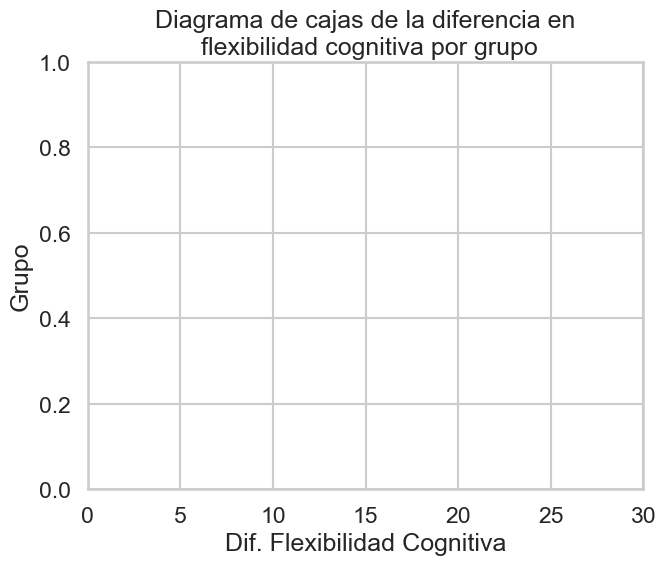

In [46]:
# Boxplot de la diferencia en flexibilidad cognitiva por grupo
sns.set_context('talk')
plt.figure(figsize=(7, 6))
#sns.boxplot(x='dif_flexibilidad_cognitiva', y='GRUPOS', data=df_copia, order=['Control', 'Concres ', 'Fonemacor'])
plt.title('Diagrama de cajas de la diferencia en\n flexibilidad cognitiva por grupo')
plt.xlabel('Dif. Flexibilidad Cognitiva')
plt.ylabel('Grupo')
plt.xticks(range(0, 31, 5))
plt.tight_layout()
#plt.show()

In [21]:
# Gráfico de conteo usando catplot por grupo para dif_flexibilidad_cognitiva
sns.set_context('talk')
def round_mid(interval):
    return int(round(interval.mid, 0))
bins_flexibilidad = pd.cut(df_copia['dif_flexibilidad_cognitiva'], bins=7)
df_copia['dif_flexibilidad_cognitiva_bin_mean'] = bins_flexibilidad.apply(round_mid)
#g2 = sns.catplot(
#    data=df_copia,
#    kind='count',
#    x='dif_flexibilidad_cognitiva_bin_mean',
#    row='GRUPOS',
#    row_order=['Control', 'Concres ', 'Fonemacor'],
#    height=3,
#    aspect=2
#)
#g2.set_titles('{row_name}')
#g2.set_axis_labels('Dif. Flexibilidad Cognitiva', 'Conteo')
#g2.fig.subplots_adjust(top=0.88)
#g2.fig.suptitle('Distribución de frecuencias de la diferencia\n en flexibilidad cognitiva por grupo', fontsize=16)

### Prueba de normalidad para la columna 'dif_flexibilidad_cognitiva' discriminada por grupo
Al igual que con la variable de control inhibitorio, se utiliza la prueba de Shapiro-Wilk para evaluar la normalidad de la diferencia en flexibilidad cognitiva por grupo, ya que cada grupo tiene n=24. Esto permite determinar si los datos cumplen el supuesto de normalidad necesario para pruebas paramétricas posteriores.

In [22]:
# Prueba de normalidad Shapiro-Wilk para 'pre_flexibilidad_cognitiva', 'post_flexibilidad_cognitiva' y 'dif_control_inhibitorio' por grupo
from scipy.stats import shapiro

for col in ['pre_flexibilidad_cognitiva', 'post_flexibilidad_cognitiva', 'dif_flexibilidad_cognitiva']:
    print(f'\nPrueba de normalidad para {col} por grupo:')
    resultados = {} 
    for grupo in df_copia['GRUPOS'].cat.categories:
        datos = df_copia[df_copia['GRUPOS'] == grupo][col]
        stat, p = shapiro(datos)
        resultados[grupo] = {'statistic': stat, 'p_value': p}

    print('Resultados de la prueba de Shapiro-Wilk por grupo:')
    for grupo, res in resultados.items():
        print(f"Grupo {grupo}: statistic={res['statistic']:.3f}, p-value={res['p_value']:.4f}")
        if res['p_value'] < 0.05:
            print('  → Con una confianza del 95%, los datos de este grupo no se distribuyen normalmente (rechaza H0)')
        else:
            print('  → Con una confianza del 95%, los datos de este grupo se distribuyen normalmente (no rechaza H0)')
    print('\n' + '-'*40 + '\n')


Prueba de normalidad para pre_flexibilidad_cognitiva por grupo:
Resultados de la prueba de Shapiro-Wilk por grupo:
Grupo Concres : statistic=0.926, p-value=0.0778
  → Con una confianza del 95%, los datos de este grupo se distribuyen normalmente (no rechaza H0)
Grupo Control: statistic=0.931, p-value=0.1029
  → Con una confianza del 95%, los datos de este grupo se distribuyen normalmente (no rechaza H0)
Grupo Fonemacor: statistic=0.840, p-value=0.0014
  → Con una confianza del 95%, los datos de este grupo no se distribuyen normalmente (rechaza H0)

----------------------------------------


Prueba de normalidad para post_flexibilidad_cognitiva por grupo:
Resultados de la prueba de Shapiro-Wilk por grupo:
Grupo Concres : statistic=0.853, p-value=0.0025
  → Con una confianza del 95%, los datos de este grupo no se distribuyen normalmente (rechaza H0)
Grupo Control: statistic=0.959, p-value=0.4208
  → Con una confianza del 95%, los datos de este grupo se distribuyen normalmente (no rechaza

In [23]:
# Calculo de la asimetria de la variable 'dif_flexibilidad_cognitiva' en el grupo 'Control'
from scipy.stats import skew
skew_control = skew(df_copia[df_copia['GRUPOS'] == 'Control']['dif_flexibilidad_cognitiva'])
print(f'Asimetría en el grupo Control: {skew_control:.3f}')

Asimetría en el grupo Control: 1.364


In [24]:
# Pruebas de hipótesis para 'pre_control_inhibitorio' y 'post_control_inhibitorio' por grupo
from scipy.stats import ttest_rel
from scipy.stats import wilcoxon

# Prueba t de Student para muestras relacionadas
print('\nPrueba t de Student para muestras relacionadas:')
grupos = ['Concres ', 'Fonemacor']
for grupo in grupos:
    antes = df_copia[df_copia['GRUPOS'] == grupo]['pre_flexibilidad_cognitiva']
    despues = df_copia[df_copia['GRUPOS'] == grupo]['post_flexibilidad_cognitiva']
    stat, p = ttest_rel(despues, antes, alternative='greater')
    print(f'Grupo {grupo}: Estadístico t: {stat:.2f}, p-valor: {p:.10f}')
    if p < 0.05:
        print(f'→ Se rechaza la hipótesis nula con una significancia del 95%: existe diferencia significativa entre pre y post en el grupo {grupo}.')
    else:
        print(f'→ No se rechaza la hipótesis nula con una significancia del 95%: no existe diferencia significativa entre pre y post en el grupo {grupo}.')
    # Tamaño del efecto para la prueba t de Student
    mean_dif = np.mean(df_copia[df_copia['GRUPOS'] == grupo]['dif_flexibilidad_cognitiva'])
    std_dif = np.std(df_copia[df_copia['GRUPOS'] == grupo]['dif_flexibilidad_cognitiva'], ddof=1)
    cohen_d = mean_dif / std_dif
    print(f'Tamaño del efecto (Cohen\'s d) en el grupo {grupo}: {cohen_d:.3f}')

    
# Prueba de Wilcoxon para muestras relacionadas
print('\nPrueba de Wilcoxon para muestras relacionadas:')
dif = df_copia[df_copia['GRUPOS'] == 'Control']['dif_flexibilidad_cognitiva']
log_dif = np.log(dif)
print("Desviación estándar de diferencias:", np.std(dif, ddof=1))
stat, p = wilcoxon(log_dif, alternative='greater')
print(f'Grupo Control: Estadístico W: {stat:.2f}, p-valor: {p:.6f}')
if p < 0.05:
    print(f'→ Se rechaza la hipótesis nula con una significancia del 95%: existe diferencia significativa entre pre y post en el grupo Control.')
else:
    print(f'→ No se rechaza la hipótesis nula con una significancia del 95%: no existe diferencia significativa entre pre y post en el grupo Control.')
# Tamaño del efecto para la prueba de Wilcoxon
N = len(dif)
mu = N * (N + 1) / 4
sigma = np.sqrt(N * (N + 1) * (2 * N + 1) / 24)
Z = (stat - mu) / sigma  # Estadístico Z estandarizado
r = Z / np.sqrt(N)  # Tamaño del efecto r
print(f'Tamaño del efecto (r) para el grupo Control: {r:.3f}')


Prueba t de Student para muestras relacionadas:
Grupo Concres : Estadístico t: 7.70, p-valor: 0.0000000408
→ Se rechaza la hipótesis nula con una significancia del 95%: existe diferencia significativa entre pre y post en el grupo Concres .
Tamaño del efecto (Cohen's d) en el grupo Concres : 1.572
Grupo Fonemacor: Estadístico t: 9.83, p-valor: 0.0000000005
→ Se rechaza la hipótesis nula con una significancia del 95%: existe diferencia significativa entre pre y post en el grupo Fonemacor.
Tamaño del efecto (Cohen's d) en el grupo Fonemacor: 2.008

Prueba de Wilcoxon para muestras relacionadas:
Desviación estándar de diferencias: 4.826707102080606
Grupo Control: Estadístico W: 253.00, p-valor: 0.000018
→ Se rechaza la hipótesis nula con una significancia del 95%: existe diferencia significativa entre pre y post en el grupo Control.
Tamaño del efecto (r) para el grupo Control: 0.601


### Prueba de Levene para comparar la varianza de 'dif_flexibilidad_cognitva' entre los grupos CONCRES y FONEMACOR
La prueba de Levene permite evaluar si la varianza de la diferencia en la flexibilidad cognitiva es similar entre los grupos CONCRES y FONEMACOR. La hipótesis nula (H0) establece que ambas varianzas son iguales; la hipótesis alternativa (H1) indica que son diferentes.

In [25]:
# Prueba de Levene para comparar la varianza de 'dif_control_inhibitorio' entre los grupos 'Concres ' y 'Fonemacor'
from scipy.stats import levene

grupo_concres = df_copia[df_copia['GRUPOS'] == 'Concres ']['dif_flexibilidad_cognitiva']
grupo_fonemacor = df_copia[df_copia['GRUPOS'] == 'Fonemacor']['dif_flexibilidad_cognitiva']

stat, p = levene(grupo_concres, grupo_fonemacor)
print(f"Levene statistic: {stat:.4f}")
print(f"p-value: {p:.4f}")
if p < 0.05:
    print('→ Se rechaza la hipótesis nula: las varianzas son significativamente diferentes.')
else:
    print('→ No se rechaza la hipótesis nula: las varianzas son similares.')

Levene statistic: 0.0315
p-value: 0.8600
→ No se rechaza la hipótesis nula: las varianzas son similares.


### Prueba t-test para comparar la flexibilidad cognitiva entre los grupos CONCRES y FONEMACOR
Se realiza la prueba t de Student para muestras independientes, ya que se ha comprobado que la variable 'dif_flexibilidad_cognitiva' cumple los supuestos requeridos para esta prueba, esto es, tiene distribución normal y varianzas similares entre los grupos. La hipótesis nula (H0) establece que no hay diferencia entre los grupos; la hipótesis alternativa (H1) indica que sí existe diferencia significativa en el rendimiento de la flexibilidad cognitiva entre el grupo CONCRES y el grupo FONEMACOR.

In [26]:
# Prueba t-test para comparar la flexibilidad cognitiva entre los grupos CONCRES y FONEMACOR
from scipy.stats import ttest_ind

grupo_concres = df_copia[df_copia['GRUPOS'] == 'Concres ']['dif_flexibilidad_cognitiva']
grupo_fonemacor = df_copia[df_copia['GRUPOS'] == 'Fonemacor']['dif_flexibilidad_cognitiva']

stat, p = ttest_ind(grupo_concres, grupo_fonemacor, equal_var=True)
print(f"t-test statistic: {stat:.4f}")
print(f"p-value: {p:.4f}")
if p < 0.05:
    print('→ Se rechaza la hipótesis nula: existe diferencia significativa entre los grupos.')
else:
    print('→ No se rechaza la hipótesis nula: no hay diferencia significativa entre los grupos.')

# Prueba de Kruskal-Wallis para 'dif_flexibilidad_cognitiva' entre los tres grupos
from scipy.stats import kruskal

stat, p = kruskal(
    df_copia[df_copia['GRUPOS'] == 'Control']['dif_flexibilidad_cognitiva'],
    df_copia[df_copia['GRUPOS'] == 'Concres ']['dif_flexibilidad_cognitiva'],
    df_copia[df_copia['GRUPOS'] == 'Fonemacor']['dif_flexibilidad_cognitiva']
)
print(f"Kruskal-Wallis H statistic: {stat:.2f}")
print(f"p-value: {p:.6f}")
if p < 0.05:
    print('→ Se rechaza la hipótesis nula con una significancia del 95%: existe diferencia significativa entre al menos dos grupos.')
else:
    print('→ No se rechaza la hipótesis nula con una significancia del 95%: no hay diferencia significativa entre los grupos.')

t-test statistic: -1.1260
p-value: 0.2660
→ No se rechaza la hipótesis nula: no hay diferencia significativa entre los grupos.
Kruskal-Wallis H statistic: 21.38
p-value: 0.000023
→ Se rechaza la hipótesis nula con una significancia del 95%: existe diferencia significativa entre al menos dos grupos.


### Tamaño del efecto Cohen's d para la comparación de flexibilidad cognitiva
El tamaño del efecto Cohen's d permite cuantificar la magnitud de la diferencia entre dos grupos tras una prueba t-test. Se calcula como la diferencia de medias dividida por la desviación estándar combinada de ambos grupos. Valores de d cercanos a 0 indican efecto pequeño, alrededor de 0.5 efecto mediano y mayores a 0.8 efecto grande.

In [27]:
# Calcular el tamaño del efecto Cohen's d para la comparación de flexibilidad cognitiva entre grupos
grupo_concres = df_copia[df_copia['GRUPOS'] == 'Concres ']['dif_flexibilidad_cognitiva']
grupo_fonemacor = df_copia[df_copia['GRUPOS'] == 'Fonemacor']['dif_flexibilidad_cognitiva']

mean_concres = grupo_concres.mean()
mean_fonemacor = grupo_fonemacor.mean()
std_concres = grupo_concres.std()
std_fonemacor = grupo_fonemacor.std()
n_concres = len(grupo_concres)
n_fonemacor = len(grupo_fonemacor)

# Desviación estándar combinada (pooled)
std_pooled = (((n_concres - 1) * std_concres ** 2 + (n_fonemacor - 1) * std_fonemacor ** 2) / (n_concres + n_fonemacor - 2)) ** 0.5

cohen_d = (mean_concres - mean_fonemacor) / std_pooled
print(f"Cohen's d: {cohen_d:.3f}")
if abs(cohen_d) < 0.2:
    print('→ Efecto despreciable')
elif abs(cohen_d) < 0.5:
    print('→ Efecto pequeño')
elif abs(cohen_d) < 0.8:
    print('→ Efecto mediano')
else:
    print('→ Efecto grande')

Cohen's d: -0.325
→ Efecto pequeño


### Prueba exacta de Fisher para comparar la mediana de 'dif_flexibilidad_cognitiva' entre 'Fonemacor' y 'Control', y entre 'Concres ' y 'Control'
Se realiza la prueba exacta de Fisher sobre la tabla de contingencia de la prueba de Mood para comparar si la mediana de la diferencia en flexibilidad cognitiva es mayor en el grupo 'Fonemacor' que en el grupo 'Control', y si es mayor en el grupo 'Concres ' que en el grupo 'Control'.
Para cada comparación, se calcula el odds ratio y el p-valor de Fisher bajo la hipótesis alternativa de que la mediana del grupo experimental es mayor que la del grupo control. Un p-valor menor a 0.05 y un odds ratio mayor a 1 apoyan la hipótesis alternativa.

In [28]:
# Prueba exacta de Fisher para comparar la mediana de 'dif_flexibilidad_cognitiva' entre 'Fonemacor' y 'Control', y entre 'Concres ' y 'Control'
from scipy.stats import median_test, fisher_exact
import pandas as pd

# Comparación 1: Fonemacor vs Control
grupo_fonemacor = df_copia[df_copia['GRUPOS'] == 'Fonemacor']['dif_flexibilidad_cognitiva']
grupo_control = df_copia[df_copia['GRUPOS'] == 'Control']['dif_flexibilidad_cognitiva']
stat1, p_mood1, med1, tbl1 = median_test(grupo_fonemacor, grupo_control, ties='ignore')
tbl1_df = pd.DataFrame(tbl1, columns=['Fonemacor', 'Control'], index=['< Mediana global', '> Mediana global'])
print("Tabla de contingencia de la prueba de Mood (Fonemacor vs Control):")
display(tbl1_df)
oddsratio1, p_fisher1 = fisher_exact(tbl1, alternative='greater')
print(f"Odds ratio: {oddsratio1:.2f}")
print(f"p-value Fisher exacta (alternativa: Fonemacor > Control): {p_fisher1:.6f}")
if p_fisher1 < 0.05 and oddsratio1 > 1:
    print('→ Se rechaza la hipótesis nula: la mediana de Fonemacor es mayor que la de Control.')
elif p_fisher1 < 0.05 and oddsratio1 < 1:
    print('→ Se rechaza la hipótesis nula: pero la mediana de Control es mayor que la de Fonemacor.')
else:
    print('→ No se rechaza la hipótesis nula: no hay evidencia suficiente para afirmar que la mediana de Fonemacor es mayor que la de Control.')

# Comparación 2: Concres vs Control
grupo_concres = df_copia[df_copia['GRUPOS'] == 'Concres ']['dif_flexibilidad_cognitiva']
stat2, p_mood2, med2, tbl2 = median_test(grupo_concres, grupo_control, ties='ignore')
tbl2_df = pd.DataFrame(tbl2, columns=['Concres ', 'Control'], index=['< Mediana global', '> Mediana global'])
print("\nTabla de contingencia de la prueba de Mood (Concres vs Control):")
display(tbl2_df)
oddsratio2, p_fisher2 = fisher_exact(tbl2, alternative='greater')
print(f"Odds ratio: {oddsratio2:.2f}")
print(f"p-value Fisher exacta (alternativa: Concres > Control): {p_fisher2:.6f}")
if p_fisher2 < 0.05 and oddsratio2 > 1:
    print('→ Se rechaza la hipótesis nula: la mediana de Concres es mayor que la de Control.')
elif p_fisher2 < 0.05 and oddsratio2 < 1:
    print('→ Se rechaza la hipótesis nula: pero la mediana de Control es mayor que la de Concres.')
else:
    print('→ No se rechaza la hipótesis nula: no hay evidencia suficiente para afirmar que la mediana de Concres es mayor que la de Control.')

Tabla de contingencia de la prueba de Mood (Fonemacor vs Control):


,Fonemacor,Control
< Mediana global,18,6
> Mediana global,6,18


Odds ratio: 9.00
p-value Fisher exacta (alternativa: Fonemacor > Control): 0.000621
→ Se rechaza la hipótesis nula: la mediana de Fonemacor es mayor que la de Control.

Tabla de contingencia de la prueba de Mood (Concres vs Control):


,Concres,Control
< Mediana global,17,6
> Mediana global,5,18


Odds ratio: 10.20
p-value Fisher exacta (alternativa: Concres > Control): 0.000470
→ Se rechaza la hipótesis nula: la mediana de Concres es mayor que la de Control.


## Gráficos adicionales para la variable FLEXIBILIDAD COGNITIVA

In [29]:
# Gráfico de conteo por grupo y sexo (hue=SEXO) para dif_flexibilidad_cognitiva
sns.set_context('talk')
'''
g2 = sns.catplot(
    data=df_copia,
    kind='count',
    x='dif_flexibilidad_cognitiva_bin_mean',
    hue='SEXO',
    row='GRUPOS',
    row_order=['Control', 'Concres ', 'Fonemacor'],
    height=3,
    aspect=2,
    palette='Set2'
)
g2.set_titles('{row_name}')
g2.set_axis_labels('Dif. Flexibilidad Cognitiva', 'Conteo')
g2.fig.subplots_adjust(top=0.88)
g2.fig.suptitle('Distribución de frecuencias de la diferencia\n en flexibilidad cognitiva por grupo y sexo', fontsize=15)
'''

"\ng2 = sns.catplot(\n    data=df_copia,\n    kind='count',\n    x='dif_flexibilidad_cognitiva_bin_mean',\n    hue='SEXO',\n    row='GRUPOS',\n    row_order=['Control', 'Concres ', 'Fonemacor'],\n    height=3,\n    aspect=2,\n    palette='Set2'\n)\ng2.set_titles('{row_name}')\ng2.set_axis_labels('Dif. Flexibilidad Cognitiva', 'Conteo')\ng2.fig.subplots_adjust(top=0.88)\ng2.fig.suptitle('Distribución de frecuencias de la diferencia\n en flexibilidad cognitiva por grupo y sexo', fontsize=15)\n"

In [30]:
# Gráfico de conteo por grupo y estrato socioeconómico (hue=ESTRATO_SOCIOECONÓMICO) para dif_flexibilidad_cognitiva (grupos en columnas)
sns.set_context('talk')
'''
g2 = sns.catplot(
    data=df_copia,
    kind='count',
    x='dif_flexibilidad_cognitiva_bin_mean',
    hue='ESTRATO_SOCIOECONÓMICO',
    row='GRUPOS',
    height=3,
    aspect=2,
    palette='Set2'
)
g2.set_axis_labels('Dif. Flexibilidad Cognitiva', 'Conteo')
g2.fig.subplots_adjust(top=0.85)
g2.fig.suptitle('Conteo de diferencia en flexibilidad cognitiva por grupo y estrato socioeconómico', fontsize=15)
# Cambiar etiquetas de la leyenda a los nombres de estrato
estrato_labels = ['Bajo', 'Medio-bajo', 'Medio', 'Medio-alto']
for t, l in zip(g2._legend.texts, estrato_labels):
    t.set_text(l)
'''

"\ng2 = sns.catplot(\n    data=df_copia,\n    kind='count',\n    x='dif_flexibilidad_cognitiva_bin_mean',\n    hue='ESTRATO_SOCIOECONÓMICO',\n    row='GRUPOS',\n    height=3,\n    aspect=2,\n    palette='Set2'\n)\ng2.set_axis_labels('Dif. Flexibilidad Cognitiva', 'Conteo')\ng2.fig.subplots_adjust(top=0.85)\ng2.fig.suptitle('Conteo de diferencia en flexibilidad cognitiva por grupo y estrato socioeconómico', fontsize=15)\n# Cambiar etiquetas de la leyenda a los nombres de estrato\nestrato_labels = ['Bajo', 'Medio-bajo', 'Medio', 'Medio-alto']\nfor t, l in zip(g2._legend.texts, estrato_labels):\n    t.set_text(l)\n"

## Comparación entre variables CONTROL INHIBITORIO y FLEXIBILIDAD COGNITIVA para el grupo FONEMACOR

### Visualización de la correlación entre dif_control_inhibitorio y dif_flexibilidad_cognitiva en el grupo Fonemacor
Para complementar el análisis de correlación de Pearson, se presenta un gráfico de dispersión (scatter plot) con línea de regresión. Este gráfico permite visualizar la relación lineal entre la mejora en control inhibitorio y la mejora en flexibilidad cognitiva dentro del grupo Fonemacor. La pendiente de la línea de regresión indica la dirección y fuerza de la relación: una pendiente positiva sugiere que a mayor mejora en una variable, también se observa mejora en la otra.

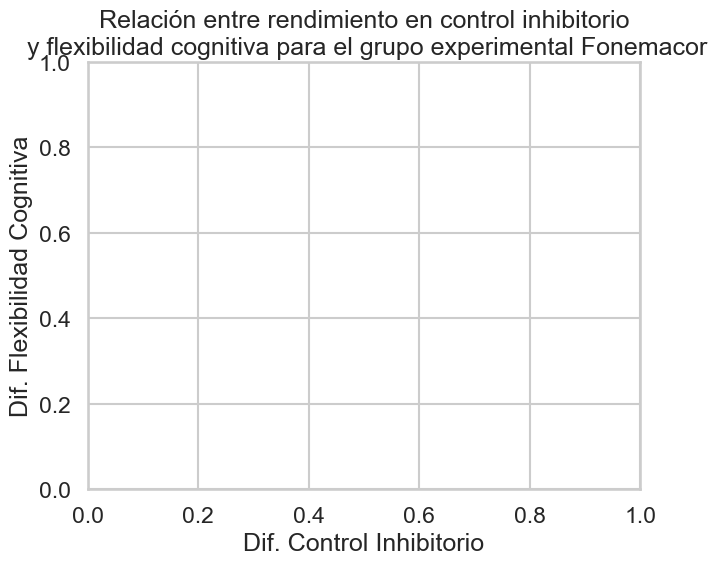

In [47]:
# Filtrar datos del grupo Fonemacor
df_fonemacor = df_copia[df_copia['GRUPOS'] == 'Fonemacor']

# Gráfico de dispersión con línea de regresión para visualizar la relación entre dif_control_inhibitorio y dif_flexibilidad_cognitiva en el grupo Fonemacor
sns.set_context('talk')
plt.figure(figsize=(7, 6))
#sns.regplot(x='dif_control_inhibitorio', y='dif_flexibilidad_cognitiva', data=df_fonemacor, ci=None, scatter_kws={'s': 60, 'alpha': 0.8}, line_kws={'color': 'red'})
plt.title('Relación entre rendimiento en control inhibitorio\n y flexibilidad cognitiva para el grupo experimental Fonemacor')
plt.xlabel('Dif. Control Inhibitorio')
plt.ylabel('Dif. Flexibilidad Cognitiva')
plt.tight_layout()
#plt.show()

### Análisis de correlación de Pearson entre 'dif_control_inhibitorio' y 'dif_flexibilidad_cognitiva' en el grupo Fonemacor
Se realiza el análisis de correlación de Pearson para evaluar la relación lineal entre la mejora en control inhibitorio y la mejora en flexibilidad cognitiva dentro del grupo Fonemacor. La correlación de Pearson es adecuada ya que ambas variables presentan distribución normal. Un coeficiente cercano a 1 indica correlación positiva fuerte, cercano a -1 indica correlación negativa fuerte, y cercano a 0 indica ausencia de correlación lineal. Se reporta el coeficiente r y el p-valor.

In [32]:
# Análisis de correlación de Pearson entre dif_control_inhibitorio y dif_flexibilidad_cognitiva en el grupo Fonemacor
from scipy.stats import pearsonr

# Calcular correlación de Pearson
r, p_value = pearsonr(df_fonemacor['dif_control_inhibitorio'], df_fonemacor['dif_flexibilidad_cognitiva'])
print(f"Coeficiente de correlación de Pearson (r): {r:.3f}")
print(f"p-value: {p_value:.4f}")
if p_value < 0.05:
    print('→ Existe una correlación lineal significativa entre las mejoras en control inhibitorio y flexibilidad cognitiva en el grupo Fonemacor.')
else:
    print('→ No se observa una correlación lineal significativa entre las mejoras en control inhibitorio y flexibilidad cognitiva en el grupo Fonemacor.')

Coeficiente de correlación de Pearson (r): -0.406
p-value: 0.0490
→ Existe una correlación lineal significativa entre las mejoras en control inhibitorio y flexibilidad cognitiva en el grupo Fonemacor.


### Prueba de Levene para comparar la varianza entre dif_control_inhibitorio y dif_flexibilidad_cognitiva en el grupo Fonemacor
La prueba de Levene permite verificar si las varianzas de las dos variables (dif_control_inhibitorio y dif_flexibilidad_cognitiva) son similares dentro del grupo Fonemacor. Un p-valor mayor a 0.05 indica que no hay evidencia suficiente para afirmar que las varianzas son diferentes, es decir, se pueden considerar similares.

In [33]:
# Prueba de Levene para comparar la varianza entre dif_control_inhibitorio y dif_flexibilidad_cognitiva en el grupo Fonemacor
from scipy.stats import levene
stat, p = levene(df_fonemacor['dif_control_inhibitorio'], df_fonemacor['dif_flexibilidad_cognitiva'])
print(f"Levene statistic: {stat:.4f}")
print(f"p-value: {p:.4f}")
if p < 0.05:
    print('→ Se rechaza la hipótesis nula: las varianzas son significativamente diferentes.')
else:
    print('→ No se rechaza la hipótesis nula: las varianzas son similares.')

Levene statistic: 0.5872
p-value: 0.4474
→ No se rechaza la hipótesis nula: las varianzas son similares.


## Analisis de correlación para las variables CONTROL INHIBITORIO y FLEXIBILIDAD COGNITIVA


Correlación por categorías de SEXO:
  SEXO = M: r = -0.333, p-value = 0.2664
    → No significativa.
  SEXO = F: r = -0.406, p-value = 0.2149
    → No significativa.

Correlación por categorías de ESTADO_CIVIL_DE_LOS_PADRES:
  ESTADO_CIVIL_DE_LOS_PADRES = Casados: r = -0.500, p-value = 0.6667
    → No significativa.
  ESTADO_CIVIL_DE_LOS_PADRES = Separados: r = -0.160, p-value = 0.6388
    → No significativa.
  ESTADO_CIVIL_DE_LOS_PADRES = Unión libre: r = -0.560, p-value = 0.0925
    → No significativa.


C:\Users\danie\AppData\Local\Temp\ipykernel_13876\2751396931.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_fonemacor.loc[:, 'ESTADO_CIVIL_DE_LOS_PADRES'] = df_fonemacor['ESTADO_CIVIL_DE_LOS_PADRES'].replace(estado_civil_map)
C:\Users\danie\AppData\Local\Temp\ipykernel_13876\2751396931.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Casados', 'Separados', 'Unión libre', 'Separados', 'Separados', ..., 'Separados', 'Separados', 'Separados', 'Unión libre', 'Unión libre']
Length: 24
Categories (3, object): ['Casados', 'Separados', 'Unión libre']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df_fonemacor.loc[:, 'ESTADO_CIVIL_DE_LOS_PADRES'] = df_fon

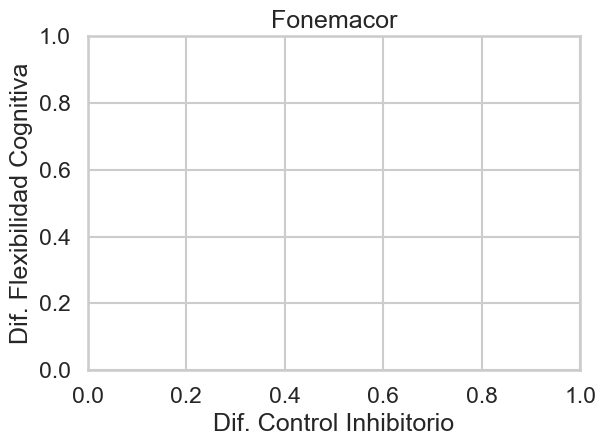

In [48]:
# Recodificar 'ESTADO_CIVIL_DE_LOS_PADRES'
estado_civil_map = {1: 'Casados', 3: 'Separados', 4: 'Unión libre'}
df_fonemacor.loc[:, 'ESTADO_CIVIL_DE_LOS_PADRES'] = df_fonemacor['ESTADO_CIVIL_DE_LOS_PADRES'].replace(estado_civil_map)

# Función para formatear nombres de leyenda
def format_legend(label):
    return str(label).replace('_', ' ').title()

# Gráficos de dispersión con línea de regresión entre dif_control_inhibitorio y dif_flexibilidad_cognitiva en Fonemacor, discriminando por variables sociodemográficas
sociodemo_vars = ['SEXO', 'ESTADO_CIVIL_DE_LOS_PADRES']
for var in sociodemo_vars:
    sns.set_context('talk')
    # Obtener los valores únicos de la variable para asignar un marker diferente a cada uno
    unique_vals = df_fonemacor[var].unique()
    markers = ['o', 's', 'D']  # Se pueden agregar más si hay más categorías
    marker_dict = dict(zip(unique_vals, markers))
    #g = sns.lmplot(data=df_fonemacor, x='dif_control_inhibitorio', y='dif_flexibilidad_cognitiva', hue=var, ci=None, markers=[marker_dict[val] for val in unique_vals], palette='Set2', height=5, aspect=1.1)
    # Formatear etiquetas de la leyenda
    new_labels = [format_legend(t.get_text()) for t in g._legend.texts]
    #for t, new_label in zip(g._legend.texts, new_labels):
    #    t.set_text(new_label)
    #g._legend.set_title(format_legend(var))
    #g._legend._loc = 1  # location=1 es 'upper right' dentro de los ejes
    plt.title(f'Fonemacor')
    plt.xlabel('Dif. Control Inhibitorio')
    plt.ylabel('Dif. Flexibilidad Cognitiva')
    plt.tight_layout()
    #plt.show()
    

# Cálculo de la correlación de Spearman para cada categoría de las variables sociodemográficas en Fonemacor
from scipy.stats import spearmanr
for var in sociodemo_vars:
    print(f'\nCorrelación por categorías de {var}:')
    for cat in df_fonemacor[var].dropna().unique():
        datos = df_fonemacor[df_fonemacor[var] == cat]
        if len(datos) > 1:
            r, p = spearmanr(datos['dif_control_inhibitorio'], datos['dif_flexibilidad_cognitiva'])
            print(f'  {var} = {cat}: r = {r:.3f}, p-value = {p:.4f}')
            if p < 0.05:
                print('    → Correlación significativa.')
            else:
                print('    → No significativa.')
        else:
            print(f'  {var} = {cat}: No hay suficientes datos para calcular la correlación.')

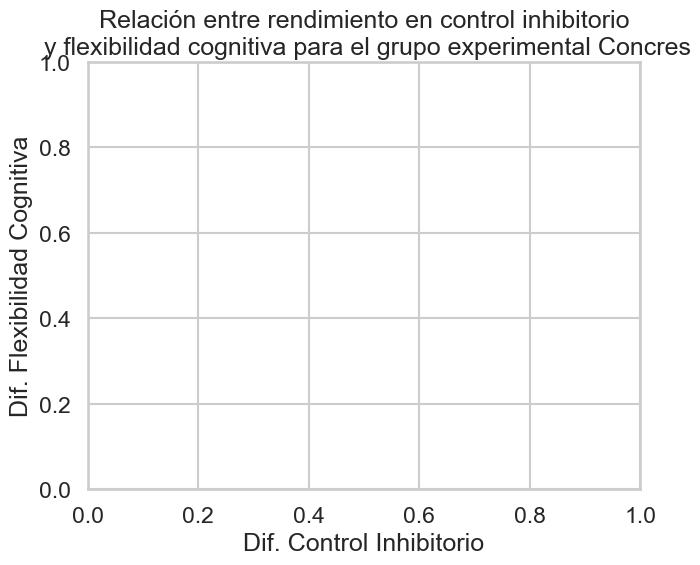

In [49]:
# Filtrar datos del grupo Concres
df_concres = df_copia[df_copia['GRUPOS'] == 'Concres ']

# Gráfico de dispersión con línea de regresión para visualizar la relación entre dif_control_inhibitorio y dif_flexibilidad_cognitiva en el grupo Fonemacor
sns.set_context('talk')
plt.figure(figsize=(7, 6))
#sns.regplot(x='dif_control_inhibitorio', y='dif_flexibilidad_cognitiva', data=df_concres, ci=None, scatter_kws={'s': 60, 'alpha': 0.8}, line_kws={'color': 'red'})
plt.title('Relación entre rendimiento en control inhibitorio\n y flexibilidad cognitiva para el grupo experimental Concres')
plt.xlabel('Dif. Control Inhibitorio')
plt.ylabel('Dif. Flexibilidad Cognitiva')
plt.tight_layout()
#plt.show()

In [36]:
# Prueba Kolmogorov-Smirnov para comparar la distribución de dif_control_inhibitorio y dif_flexibilidad_cognitiva en el grupo Concres
grupo_concres = df_copia[df_copia['GRUPOS'] == 'Concres ']
stat, p = ks_2samp(
    grupo_concres['dif_control_inhibitorio'],
    grupo_concres['dif_flexibilidad_cognitiva']
)
print(f"Kolmogorov-Smirnov statistic: {stat:.4f}")
print(f"p-value: {p:.4f}")
if p < 0.05:
    print('→ Se rechaza la hipótesis nula: las distribuciones son significativamente diferentes.')
else:
    print('→ No se rechaza la hipótesis nula: no hay evidencia suficiente para afirmar que las distribuciones son diferentes. Se pueden considerar similares.')

Kolmogorov-Smirnov statistic: 0.4167
p-value: 0.0299
→ Se rechaza la hipótesis nula: las distribuciones son significativamente diferentes.


In [37]:
# Cálculo del coeficiente de correlación de Spearman rho entre dif_control_inhibitorio y dif_flexibilidad_cognitiva en el grupo Concres
from scipy.stats import spearmanr

grupo_concres = df_copia[df_copia['GRUPOS'] == 'Concres ']
rho, p = spearmanr(grupo_concres['dif_control_inhibitorio'], grupo_concres['dif_flexibilidad_cognitiva'])
print(f"Coeficiente de Spearman rho: {rho:.3f}")
print(f"p-value: {p:.4f}")
if p < 0.05:
    print('→ Existe una correlación significativa según Spearman.')
else:
    print('→ No se observa una correlación significativa según Spearman.')

Coeficiente de Spearman rho: 0.182
p-value: 0.3945
→ No se observa una correlación significativa según Spearman.



Correlación de Spearman por categorías de SEXO:
  SEXO = M: rho = 0.414, p-value = 0.1596
    → No significativa.
  SEXO = F: rho = 0.071, p-value = 0.8351
    → No significativa.

Correlación de Spearman por categorías de ESTADO_CIVIL_DE_LOS_PADRES:
  ESTADO_CIVIL_DE_LOS_PADRES = Unión libre: rho = 0.212, p-value = 0.4664
    → No significativa.
  ESTADO_CIVIL_DE_LOS_PADRES = Separados: rho = 0.947, p-value = 0.0144
    → Correlación significativa.
  ESTADO_CIVIL_DE_LOS_PADRES = Casados: rho = -0.205, p-value = 0.7406
    → No significativa.


C:\Users\danie\AppData\Local\Temp\ipykernel_13876\1838833282.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  grupo_concres.loc[:, 'ESTADO_CIVIL_DE_LOS_PADRES'] = grupo_concres['ESTADO_CIVIL_DE_LOS_PADRES'].replace(estado_civil_map)
C:\Users\danie\AppData\Local\Temp\ipykernel_13876\1838833282.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Unión libre', 'Separados', 'Unión libre', 'Unión libre', 'Separados', ..., 'Unión libre', 'Casados', 'Casados', 'Unión libre', 'Casados']
Length: 24
Categories (3, object): ['Casados', 'Separados', 'Unión libre']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  grupo_concres.loc[:, 'ESTADO_CIVIL_DE_LOS_PADRES'] = gru

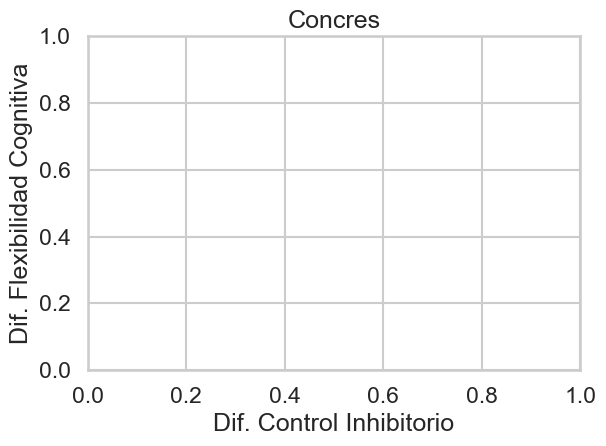

In [50]:
# Gráficos de dispersión con línea de regresión entre dif_control_inhibitorio y dif_flexibilidad_cognitiva en Concres, discriminando por variables sociodemográficas
sociodemo_vars = ['SEXO', 'ESTADO_CIVIL_DE_LOS_PADRES']
grupo_concres = df_copia[df_copia['GRUPOS'] == 'Concres ']

# Recodificar 'ESTADO_CIVIL_DE_LOS_PADRES'
estado_civil_map = {1: 'Casados', 3: 'Separados', 4: 'Unión libre'}
grupo_concres.loc[:, 'ESTADO_CIVIL_DE_LOS_PADRES'] = grupo_concres['ESTADO_CIVIL_DE_LOS_PADRES'].replace(estado_civil_map)

# Función para formatear nombres de leyenda
def format_legend(label):
    return str(label).replace('_', ' ').title()

for var in sociodemo_vars:
    sns.set_context('talk')
    # Obtener los valores únicos de la variable para asignar un marker diferente a cada uno
    unique_vals = grupo_concres[var].unique()
    markers = ['o', 's', 'D']  # Se pueden agregar más si hay más categorías
    marker_dict = dict(zip(unique_vals, markers))
    #g = sns.lmplot(data=grupo_concres, x='dif_control_inhibitorio', y='dif_flexibilidad_cognitiva', hue=var, ci=None, markers=[marker_dict[val] for val in unique_vals], palette='Set2', height=5, aspect=1.1)
    # Formatear etiquetas de la leyenda
    new_labels = [format_legend(t.get_text()) for t in g._legend.texts]
    for t, new_label in zip(g._legend.texts, new_labels):
        t.set_text(new_label)
    #g._legend.set_title(format_legend(var))
    #g._legend._loc = 1  # location=1 es 'upper right' dentro de los ejes
    plt.title(f'Concres')
    plt.xlabel('Dif. Control Inhibitorio')
    plt.ylabel('Dif. Flexibilidad Cognitiva')
    plt.tight_layout()
    #plt.show()

# Cálculo de la correlación de Spearman para cada categoría de las variables sociodemográficas en Concres
for var in sociodemo_vars:
    print(f'\nCorrelación de Spearman por categorías de {var}:')
    for cat in grupo_concres[var].dropna().unique():
        datos = grupo_concres[grupo_concres[var] == cat]
        if len(datos) > 1:
            rho, p = spearmanr(datos['dif_control_inhibitorio'], datos['dif_flexibilidad_cognitiva'])
            print(f'  {var} = {cat}: rho = {rho:.3f}, p-value = {p:.4f}')
            if p < 0.05:
                print('    → Correlación significativa.')
            else:
                print('    → No significativa.')
        else:
            print(f'  {var} = {cat}: No hay suficientes datos para calcular la correlación.')

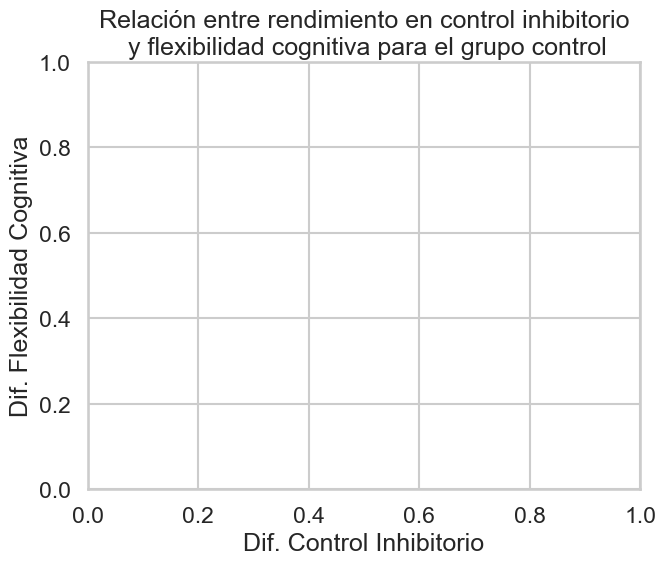

In [51]:
# Filtrar datos del grupo Control
df_control = df_copia[df_copia['GRUPOS'] == 'Control']

# Gráfico de dispersión con línea de regresión para visualizar la relación entre dif_control_inhibitorio y dif_flexibilidad_cognitiva en el grupo Control
sns.set_context('talk')
plt.figure(figsize=(7, 6))
#sns.regplot(x='dif_control_inhibitorio', y='dif_flexibilidad_cognitiva', data=df_control, ci=None, scatter_kws={'s': 60, 'alpha': 0.8}, line_kws={'color': 'red'})
plt.title('Relación entre rendimiento en control inhibitorio\n y flexibilidad cognitiva para el grupo control')
plt.xlabel('Dif. Control Inhibitorio')
plt.ylabel('Dif. Flexibilidad Cognitiva')
plt.tight_layout()
#plt.show()

In [40]:
# Cálculo del coeficiente de correlación de Spearman rho entre dif_control_inhibitorio y dif_flexibilidad_cognitiva en el grupo Control
grupo_control = df_copia[df_copia['GRUPOS'] == 'Control']
rho, p = spearmanr(grupo_control['dif_control_inhibitorio'], grupo_control['dif_flexibilidad_cognitiva'])
print(f"Coeficiente de Spearman rho: {rho:.3f}")
print(f"p-value: {p:.4f}")
if p < 0.05:
    print('→ Existe una correlación significativa según Spearman.')
else:
    print('→ No se observa una correlación significativa según Spearman.')

Coeficiente de Spearman rho: 0.539
p-value: 0.0065
→ Existe una correlación significativa según Spearman.



Correlación de Spearman por categorías de SEXO:
  SEXO = F: rho = 0.504, p-value = 0.0948
    → No significativa.
  SEXO = M: rho = 0.517, p-value = 0.0853
    → No significativa.

Correlación de Spearman por categorías de ESTADO_CIVIL_DE_LOS_PADRES:
  ESTADO_CIVIL_DE_LOS_PADRES = Unión libre: rho = 0.411, p-value = 0.2091
    → No significativa.
  ESTADO_CIVIL_DE_LOS_PADRES = Separados: rho = 0.604, p-value = 0.1509
    → No significativa.
  ESTADO_CIVIL_DE_LOS_PADRES = Casados: rho = 0.667, p-value = 0.1481
    → No significativa.


C:\Users\danie\AppData\Local\Temp\ipykernel_13876\1789138291.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  grupo_control.loc[:, 'ESTADO_CIVIL_DE_LOS_PADRES'] = grupo_control['ESTADO_CIVIL_DE_LOS_PADRES'].replace(estado_civil_map)
C:\Users\danie\AppData\Local\Temp\ipykernel_13876\1789138291.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Unión libre', 'Unión libre', 'Separados', 'Casados', 'Separados', ..., 'Separados', 'Casados', 'Separados', 'Casados', 'Unión libre']
Length: 24
Categories (3, object): ['Casados', 'Separados', 'Unión libre']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  grupo_control.loc[:, 'ESTADO_CIVIL_DE_LOS_PADRES'] = grupo_c

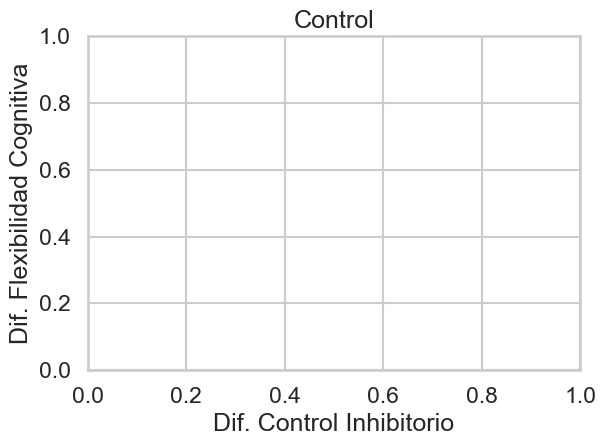

In [52]:
# Gráficos de dispersión con línea de regresión entre dif_control_inhibitorio y dif_flexibilidad_cognitiva en Control, discriminando por variables sociodemográficas
sociodemo_vars = ['SEXO', 'ESTADO_CIVIL_DE_LOS_PADRES']
grupo_control = df_copia[df_copia['GRUPOS'] == 'Control']

# Recodificar 'ESTADO_CIVIL_DE_LOS_PADRES'
estado_civil_map = {1: 'Casados', 3: 'Separados', 4: 'Unión libre'}
grupo_control.loc[:, 'ESTADO_CIVIL_DE_LOS_PADRES'] = grupo_control['ESTADO_CIVIL_DE_LOS_PADRES'].replace(estado_civil_map)

# Función para formatear nombres de leyenda
def format_legend(label):
    return str(label).replace('_', ' ').title()

for var in sociodemo_vars:
    sns.set_context('talk')
    # Obtener los valores únicos de la variable para asignar un marker diferente a cada uno
    unique_vals = grupo_control[var].unique()
    markers = ['o', 's', 'D']  # Se pueden agregar más si hay más categorías
    marker_dict = dict(zip(unique_vals, markers))
    #g = sns.lmplot(data=grupo_control, x='dif_control_inhibitorio', y='dif_flexibilidad_cognitiva', hue=var, ci=None, markers=[marker_dict[val] for val in unique_vals], palette='Set2', height=5, aspect=1.1)
    # Formatear etiquetas de la leyenda
    new_labels = [format_legend(t.get_text()) for t in g._legend.texts]
    #for t, new_label in zip(g._legend.texts, new_labels):
    #    t.set_text(new_label)
    #g._legend.set_title(format_legend(var))
    #g._legend._loc = 1  # location=1 es 'upper right' dentro de los ejes
    plt.title(f'Control')
    plt.xlabel('Dif. Control Inhibitorio')
    plt.ylabel('Dif. Flexibilidad Cognitiva')
    plt.tight_layout()
    #plt.show()

# Cálculo de la correlación de Spearman para cada categoría de las variables sociodemográficas en Control
for var in sociodemo_vars:
    print(f'\nCorrelación de Spearman por categorías de {var}:')
    for cat in grupo_control[var].dropna().unique():
        datos = grupo_control[grupo_control[var] == cat]
        if len(datos) > 1:
            rho, p = spearmanr(datos['dif_control_inhibitorio'], datos['dif_flexibilidad_cognitiva'])
            print(f'  {var} = {cat}: rho = {rho:.3f}, p-value = {p:.4f}')
            if p < 0.05:
                print('    → Correlación significativa.')
            else:
                print('    → No significativa.')
        else:
            print(f'  {var} = {cat}: No hay suficientes datos para calcular la correlación.')

## Heatmap de correlaciones adecuadas entre variables categóricas y diferencias de rendimiento
En este análisis, se visualiza la correlación entre cada variable categórica y las variables de diferencia (dif_control_inhibitorio, dif_flexibilidad_cognitiva) dentro de cada grupo.

- Si la variable de diferencia es normal en el grupo, se calcula la **correlación de Pearson** (codificando la variable categórica numéricamente).
- Si la variable de diferencia no es normal, se calcula la **correlación de Spearman**.
Esto permite identificar asociaciones lineales o monótonas según la naturaleza de los datos.

## Resumen de valores p y su interpretación (nivel de confianza 95%)
A continuación se presenta un resumen de los valores p asociados a cada coeficiente de correlación calculado en los heatmaps consolidados. Para cada celda:
- Si el valor p es menor a 0.05, la correlación es estadísticamente significativa al 95% de confianza.
- Si el valor p es mayor o igual a 0.05, no se puede afirmar que exista una asociación significativa.

Se reporta para cada grupo, variable categórica y variable de diferencia: el coeficiente de correlación, el valor p y la interpretación de significancia.

## Actualización del análisis para variables categóricas
- La variable '¿CÚANTO_TIEMPO_ESTÁ_EXPUESTO?' se recodifica y se ordena como ordinal: ['<1h', '1h', '2h', '3h', '>3h'].
- Para esta variable, la correlación siempre será calculada con Spearman, para responder si a mayor tiempo de exposición hay mayor cambio en control inhibitorio o flexibilidad cognitiva.

In [42]:
# Reordenar la variable 'ESTRATO_SOCIOECONÓMICO' según el orden correcto
orden_estrato = [1, 2, 3]
df_copia['ESTRATO_SOCIOECONÓMICO'] = pd.Categorical(df_copia['ESTRATO_SOCIOECONÓMICO'], categories=orden_estrato, ordered=True)

# Reordenar la variable 'NIVEL_EDUCATIVO_(MADRE)' y 'NIVEL_EDUCATIVO_(PADRE)' según el orden correcto
orden_educacion = [3, 4, 6]
df_copia['NIVEL_EDUCATIVO_(MADRE)'] = pd.Categorical(df_copia['NIVEL_EDUCATIVO_(MADRE)'], categories=orden_educacion, ordered=True)
df_copia['NIVEL_EDUCATIVO_(PADRE)'] = pd.Categorical(df_copia['NIVEL_EDUCATIVO_(PADRE)'], categories=orden_educacion, ordered=True)

# Reordenar la variable '¿CÚANTO_TIEMPO_ESTÁ_EXPUESTO?' según el orden correcto
orden_tiempo = ['<1h', '1h', '2h', '3h', '>3h']
df_copia['¿CÚANTO_TIEMPO_ESTÁ_EXPUESTO?'] = pd.Categorical(df_copia['¿CÚANTO_TIEMPO_ESTÁ_EXPUESTO?'], categories=orden_tiempo, ordered=True)

# Recodificar variables dicotómicas a 0 (No) y 1 (Sí)
dicotomicas = {'¿PRACTICA_ALGÚN_DEPORTE?': {'No': 0, 'Sí': 1, 'Si': 1, 'SI': 1},
               '¿LEE_O_LE_LEEN_LIBROS?_(_Cuentos_infantiles_)': {'No': 0, 'Sí': 1, 'Si': 1, 'SI': 1}}
for var, mapping in dicotomicas.items():
    df_copia[var] = df_copia[var].replace(mapping)

# Verificar que las variables categóricas están correctamente ordenadas y las dicotómicas están recodificadas
print("\nVariables categóricas ordenadas y dicotómicas recodificadas:")
print(df_copia[['ESTRATO_SOCIOECONÓMICO', 'NIVEL_EDUCATIVO_(MADRE)', 'NIVEL_EDUCATIVO_(PADRE)', '¿CÚANTO_TIEMPO_ESTÁ_EXPUESTO?', '¿PRACTICA_ALGÚN_DEPORTE?', '¿LEE_O_LE_LEEN_LIBROS?_(_Cuentos_infantiles_)']].head())


Variables categóricas ordenadas y dicotómicas recodificadas:
  ESTRATO_SOCIOECONÓMICO NIVEL_EDUCATIVO_(MADRE) NIVEL_EDUCATIVO_(PADRE)  \
0                      1                       3                       3   
1                      1                       4                       6   
2                      1                       3                       4   
3                      3                       3                       6   
4                      3                       3                       3   

  ¿CÚANTO_TIEMPO_ESTÁ_EXPUESTO?  ¿PRACTICA_ALGÚN_DEPORTE?  \
0                            2h                         0   
1                           <1h                         1   
2                            1h                         1   
3                            3h                         0   
4                            2h                         0   

  ¿LEE_O_LE_LEEN_LIBROS?_(_Cuentos_infantiles_)  
0                                             1  
1             

C:\Users\danie\AppData\Local\Temp\ipykernel_13876\1247448535.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copia[var] = df_copia[var].replace(mapping)
C:\Users\danie\AppData\Local\Temp\ipykernel_13876\1247448535.py:18: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_copia[var] = df_copia[var].replace(mapping)


,Grupo,Variable categórica,Variable dependiente,Método,Correlación,p-valor,Interpretación
0,Concres,ESTRATO_SOCIOECONÓMICO,dif_control_inhibitorio,Spearman,0.246099,0.246370,No significativo (p ≥ 0.05)
1,Concres,ESTRATO_SOCIOECONÓMICO,dif_flexibilidad_cognitiva,Spearman,0.117207,0.585459,No significativo (p ≥ 0.05)
2,Concres,NIVEL_EDUCATIVO_(MADRE),dif_control_inhibitorio,Spearman,0.033612,0.876099,No significativo (p ≥ 0.05)
3,Concres,NIVEL_EDUCATIVO_(MADRE),dif_flexibilidad_cognitiva,Spearman,0.122515,0.568465,No significativo (p ≥ 0.05)
4,Concres,NIVEL_EDUCATIVO_(PADRE),dif_control_inhibitorio,Spearman,-0.064507,0.764588,No significativo (p ≥ 0.05)
5,Concres,NIVEL_EDUCATIVO_(PADRE),dif_flexibilidad_cognitiva,Spearman,-0.373484,0.072223,No significativo (p ≥ 0.05)
6,Concres,¿PRACTICA_ALGÚN_DEPORTE?,dif_control_inhibitorio,Spearman,-0.006263,0.976828,No significativo (p ≥ 0.05)
7,Concres,¿PRACTICA_ALGÚN_DEPORTE?,dif_flexibilidad_cognitiva,Pearson,-0.123442,0.565521,No significativo (p ≥ 0.05)
8,Concres,¿LEE_O_LE_LEEN_LIBROS?_(_Cuentos_infantiles_),dif_control_inhibitorio,Spearman,-0.024342,0.910110,No significativo (p ≥ 0.05)
9,Concres,¿LEE_O_LE_LEEN_LIBROS?_(_Cuentos_infantiles_),dif_flexibilidad_cognitiva,Pearson,0.216070,0.310556,No significativo (p ≥ 0.05)


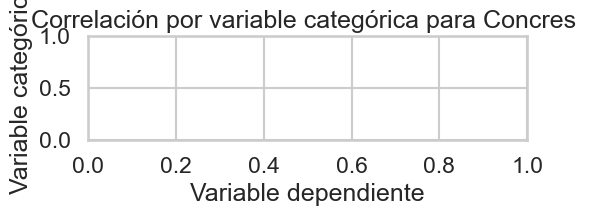

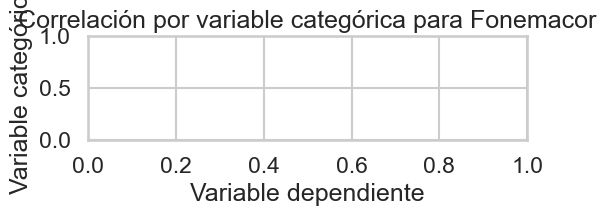

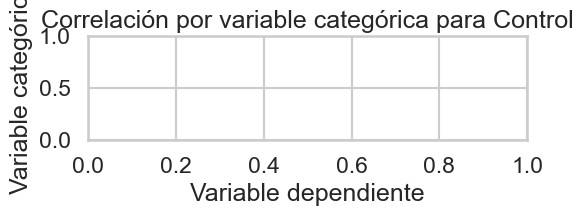

In [53]:
# Calcular heatmap y tabla resumen con variables dicotómicas codificadas
cat_vars_actualizadas = ['ESTRATO_SOCIOECONÓMICO', 'NIVEL_EDUCATIVO_(MADRE)', 'NIVEL_EDUCATIVO_(PADRE)', '¿PRACTICA_ALGÚN_DEPORTE?', '¿LEE_O_LE_LEEN_LIBROS?_(_Cuentos_infantiles_)', '¿CÚANTO_TIEMPO_ESTÁ_EXPUESTO?']
grupo_var = 'GRUPOS'
diff_vars = ['dif_control_inhibitorio', 'dif_flexibilidad_cognitiva']
normalidad = {
    'Control': {'dif_control_inhibitorio': False, 'dif_flexibilidad_cognitiva': False},
    'Concres ': {'dif_control_inhibitorio': False, 'dif_flexibilidad_cognitiva': True},
    'Fonemacor': {'dif_control_inhibitorio': True, 'dif_flexibilidad_cognitiva': True}
}
dicotomicas = ['¿PRACTICA_ALGÚN_DEPORTE?', '¿LEE_O_LE_LEEN_LIBROS?_(_Cuentos_infantiles_)']

# Mapeo para nombres de variables de diferencia
diff_map = {'dif_control_inhibitorio': 'Control\n Inhibitorio', 'dif_flexibilidad_cognitiva': 'Flexibilidad\n Cognitiva'}

for grupo in df_copia[grupo_var].unique():
    matriz = []
    for cat in cat_vars_actualizadas:
        fila = []
        for diff in diff_vars:
            subset = df_copia[df_copia[grupo_var] == grupo]
            if cat in dicotomicas:
                x = subset[cat]
            else:
                x = subset[cat].cat.codes if hasattr(subset[cat], 'cat') else subset[cat] # convertir a códigos numéricos si es necesario. Función hasattr verifica si la columna tiene el atributo 'cat' (categorical)
            y = subset[diff]
            if cat in dicotomicas:
                if normalidad[grupo][diff]:
                    try:
                        corr, _ = pearsonr(x, y)
                    except Exception:
                        corr = np.nan
                else:
                    try:
                        corr, _ = spearmanr(x, y)
                    except Exception:
                        corr = np.nan
            else:
                try:
                    corr, _ = spearmanr(x, y)
                except Exception:
                    corr = np.nan
            fila.append(corr)
        matriz.append(fila)
    # Formatear etiquetas del eje y (title case)
    y_labels = [str(label).replace('_', ' ').title() for label in cat_vars_actualizadas]
    # Formatear etiquetas del eje z (columnas) usando el mapeo
    z_labels = [diff_map.get(col, col) for col in diff_vars]
    heatmap_group = pd.DataFrame(matriz, index=y_labels, columns=z_labels)
    plt.figure(figsize=(6, 2.5))
    #ax=sns.heatmap(heatmap_group, annot=True, fmt='.2f', cmap='coolwarm', center=0, cbar_kws={'label': 'Correlación'})
    plt.title(f'Correlación por variable categórica para {grupo}')
    plt.xlabel('Variable dependiente')
    plt.ylabel('Variable categórica')
    #ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    plt.tight_layout()
    #plt.show()

# Tabla resumen de correlaciones
resumen = []
for grupo in df_copia[grupo_var].unique():
    for cat in cat_vars_actualizadas:
        for diff in diff_vars:
            subset = df_copia[df_copia[grupo_var] == grupo]
            if cat in dicotomicas:
                x = subset[cat]
            else:
                x = subset[cat].cat.codes if hasattr(subset[cat], 'cat') else subset[cat]
            y = subset[diff]
            if cat in dicotomicas:
                if normalidad[grupo][diff]:
                    try:
                        corr, pval = pearsonr(x, y)
                        metodo = 'Pearson'
                    except Exception:
                        corr, pval, metodo = np.nan, np.nan, 'Pearson'
                else:
                    try:
                        corr, pval = spearmanr(x, y)
                        metodo = 'Spearman'
                    except Exception:
                        corr, pval, metodo = np.nan, np.nan, 'Spearman'
            else:
                try:
                    corr, pval = spearmanr(x, y)
                    metodo = 'Spearman'
                except Exception:
                    corr, pval, metodo = np.nan, np.nan, 'Spearman'
            if pd.isna(pval):
                interpretacion = 'No calculable'
            elif pval < 0.05:
                interpretacion = 'Significativo (p < 0.05)'
            else:
                interpretacion = 'No significativo (p ≥ 0.05)'
            resumen.append({
                'Grupo': grupo,
                'Variable categórica': cat,
                'Variable dependiente': diff,
                'Método': metodo,
                'Correlación': corr,
                'p-valor': pval,
                'Interpretación': interpretacion
            })

tabla_resumen = pd.DataFrame(resumen)
display(tabla_resumen)